## ProteoQ Sarcoma exosomes

In [57]:
library(proteoQDA) #devtools::install_github("qzhang503/proteoQDA")
library(proteoQ) #devtools::install_github("qzhang503/proteoQ")
library(NMF) #install.packages('NMF')
library(downloader) #install.packages('downloader')
library(RColorBrewer) #install.packages('RColorBrewer')
library(pheatmap) #install.packages('pheatmap')
library(ggplot2) #install.packages('ggplot2')
library(tidyverse) #install.packages('tidyverse')
library(ggthemes) #install.packages('ggthemes')
library(MASS) #install.packages('MASS')
library(ggrepel) #install.packages('ggrepel')
library(mice)  #install.packages('mice')
`%notin%` <- Negate(`%in%`)

In [58]:
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.2/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.2/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] mice_3.15.0         ggrepel_0.9.3       MASS_7.3-58.3      
 [4] ggthemes_4.2.4      lubridate_1.9.2     forcats_1.0.0      
 [7] stringr_1.5.0       dplyr_1.1.2         purrr_1.0.1        
[10] readr_2.1.4         tidyr_1.3.0         tibble_3.2.1       
[13] tidyverse_2.0.0     ggplot2_3.4.2       pheatmap_1.0.12    
[16] RColorBrewer_1.1-3  downloader_0.4      NMF_0.26           
[19] Biobase_2.58.0      BiocGenerics_0.44.0 cluster_2.1.4      
[22] rngtools_1.5.2      registry_0.5-1 

In [59]:
# this doesn't help
setwd("/Users/jasonheld/Manuscripts/2022_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples")
getwd() # get working directory
.libPaths() # where packages are installed to

[1] "/Users/jasonheld/Manuscripts/2022_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples"

[1] "/Library/Frameworks/R.framework/Versions/4.2/Resources/library"

## decoding ProteoQ

## enough prep, now get to it!

In [60]:
serumGenes <- c(
  "SERPINA1",
  "HP",
  "IGHA1",
  "IGHG1",
  "FGA",
  "ALB",
  "TF",
  "ORM1",
  "A2M",
  "APOA1",
  "APOA2",
  "C3",
  "IGHM",
  "TTR",
  "HBD"
)

In [61]:
# find and load all results files from folder of interest

# Mascot
#copy_mascot_gtmt()

# or MaxQuant
#copy_maxquant_gtmt()

# or MSFragger
#copy_msfragger_gtmt()

# or Spectrum Mill
#copy_specmill_gtmt()

In [62]:
#?load_expts # help
load_expts(
    "/Users/jasonheld/Manuscripts/2022_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples"
#    "/Users/jasonheld/Manuscripts/2023_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples/LMSsubset"
#    "/Users/jasonheld/Manuscripts/2023_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples/LSsubset"
#    "/Users/jasonheld/Manuscripts/2023_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples/PSMFHsubset"
#    "/Users/jasonheld/Manuscripts/2023_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples/MPNSTsubset"
#    "/Users/jasonheld/Manuscripts/2023_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples/LMSBaselineSubset"
)

Rows: 30298 Columns: 418
── Column specification ────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (114): Sequence, N-term cleavage window, C-term cleavage window, Amino a...
dbl (303): A Count, R Count, N Count, D Count, C Count, Q Count, E Count, G ...
lgl   (1): Taxonomy IDs

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [63]:
# columns keys in PSM files suitable for varargs of `filter_`
#?normPSM # help

normPSM(
  #col_select = 'LMS', # this selection is not useful in the end. Don't be tempted
  group_psm_by = pep_seq, 
  group_pep_by = gene, 
  fasta = c("/Users/jasonheld/Manuscripts/2022_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/uniprot_hs_2020_05.fasta"), 
  rm_craps = TRUE,
  rm_krts = FALSE,
  rm_outliers = FALSE, 
  annot_kinases = TRUE, 
  plot_rptr_int = TRUE, 
#  plot_log2FC_cv = TRUE, 

  # Mascot   
  #filter_psms = rlang::exprs(pep_expect <= .1, pep_score >= 15), 
  #filter_more_psms = rlang::exprs(pep_rank == 1),

  #MQ
#  filter_psms = rlang::exprs(PEP <= .1), # Tim doesn't include it, and in theory MQ filters already
)

Primary column keys in "msms[...].txt" for "filter_" varargs.

Warning message:
“
Column keys in "msms[...].txt" may be changed to a "Title Case":
( ) "Protein Names" <-> "Protein Names"... 
(x) "Protein names" -> "Protein Names"... 
(Lookups in "~/PSM/cache/MQ_colkey_lookup.csv".)
”
At acc_type = "uniprot_acc":
 the number of entries in FASTA: 20375
 the number of entries matched: 3534
 percent annotated: 0.173


Parsing shared proteins...


At acc_type = "other_acc":
 the number of entries in FASTA: 20375
 the number of entries matched: 0
 percent annotated: 0.000

At acc_type = "uniprot_acc":
 the number of entries in FASTA: 20375
 the number of entries matched: 3948
 percent annotated: 0.194

No intensity columns available.

No intensity columns available.

No intensity columns available.

No intensity columns available.

No intensity columns available.

No intensity columns available.

No intensity columns available.

No intensity columns available.

No intensity columns available

In [64]:
## No applicable with LFQ
# purgePSM(ymax = 1)

In [65]:
# PSMs to peptides
#?PSM2Pep # help
PSM2Pep()

Primary column keys in "PSM/TMTset1_LCMSinj1_PSM_N.txt" etc. for "filter_" varargs.



ERROR: Error in checkForRemoteErrors(val): 89 nodes produced errors; first error: No samples at TMT_Set 2 and LCMS_Injection 2.


In [66]:
# peptide data merging
mergePep(
  # omit_single_lfq = FALSE, 
)

MaxQuant file `peptides.txt` found.

Assigning multiple-dipped peptide sequences.


At acc_type = "other_acc":
 the number of entries in FASTA: 20375
 the number of entries matched: 0
 percent annotated: 0.000

At acc_type = "uniprot_acc":
 the number of entries in FASTA: 20375
 the number of entries matched: 3501
 percent annotated: 0.172

method_align = MC

n_comp = NULL

col_select = Sample_ID



In [67]:
# peptide histograms (median-centered)
pepHist(
  scale_log2r = TRUE,
  xmin = -4, 
  xmax = 4,
  ncol = 6, 
  limitsize = FALSE
)

Primary column keys in `Peptide/Peptide.txt` for `filter_` varargs.

Primary file loaded: /Users/jasonheld/Manuscripts/2022_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples/Peptide/Peptide.txt


scale_log2r = TRUE

impute_na = FALSE

complete_cases = FALSE



The utility standPep standardizes peptide results from mergePep with additional choices in data alignment.

The parameters range_log2r and range_int outline the ranges of peptide log2FC and reporter-ion intensity, respectively, for use in defining the CV and scaling the log2FC across samples. The log2FC of peptide data will be aligned by median centering across samples by default. If method_align = MGKernel is chosen, log2FC will be aligned under the assumption of multiple Gaussian kernels.[7] The companion parameter n_comp defines the number of Gaussian kernels and seed set a seed for reproducible fittings. Additional parameters, such as, maxit and epsilon, are defined in and for use with normalmixEM (https://cran.r-project.org/web/packages/mixtools/mixtools.pdf).

It is also feasible to perform standPep against defined sample columns and data rows. Moreover, the utility can be applied interactively with cumulative effects. Combinations and iterations of the features can lead to specialty sample alignments that will discuss soon (sections 1.3.5 - 1.3.7). Before delving more into the details, we would probably need some helps from the pepHist utility in the immediately following.

In [68]:
# peptide data aligned by human subsets and 

standPep(
  method_align = MGKernel, #MGKernal, #MC
  range_log2r = c(5, 95), 
  range_int = c(5, 95), 
  n_comp = 3, # defines the number of Gaussian kernels
  seed = 749662, # set a seed for reproducible fittings
  maxit = 200, 
  epsilon = 1e-05, 
)

Primary column keys in `Peptide/Peptide.txt` for `slice_` varargs.

method_align = MGKernel

n_comp = 3

col_select = Sample_ID



## 1.3.4 pepHist

The pepHist utility plots the histograms of peptide log2FC. It further bins the data by their contributing reporter-ion or LFQ intensity. In the examples shown below, we compare the log2FC profiles of peptides with and without scaling normalization:[8]

In [69]:
# updated histograms
pepHist(
  #scale_log2r = FALSE, # default is TRUE
  xmin = -4, 
  xmax = 4,
  ncol = 6, 
  filename = updated.png,
  limitsize = FALSE,
)

Primary column keys in `Peptide/Peptide.txt` for `filter_` varargs.

Primary file loaded: /Users/jasonheld/Manuscripts/2022_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples/Peptide/Peptide.txt


scale_log2r = TRUE

impute_na = FALSE

complete_cases = FALSE



## 1.3.8 purgePep

Analogously to the PSM processing, we may nullify data points of peptides by specifying a cut-off in their protein CVs:

In [70]:
# optional: cleanup of peptide groups
purgePep(
    filename = purgePEP.png, # Peptide/log2FC_cv/purged
    ymax = 4 # for the plot
)

In [71]:
# peptides to proteins

Pep2Prn(
    use_unique_pep = TRUE,
    filter_topserum = exprs(gene %notin% serumGenes),
)

Column keys in `Peptide/Peptide.txt` for "filter_" varargs.

method_align = MC

n_comp = NULL

col_select = Sample_ID



In [72]:
# protein histograms (median-centered)
prnHist(
  scale_log2r = FALSE,
  xmin = -5, 
  xmax = 5,
  ncol = 6,
  limitsize = FALSE,
)

Primary column keys in `Protein/Protein.txt` for `filter_` varargs.

Primary file loaded: /Users/jasonheld/Manuscripts/2022_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples/Protein/Protein.txt


scale_log2r = FALSE

impute_na = FALSE

complete_cases = FALSE



In [73]:
# protein data standardization by human subsets and 
# with a minimal of three measures (out of six) in intensity
standPrn(
  method_align = MGKernel, #MGKernel, #MC
  range_log2r = c(5, 95), 
  range_int = c(5, 95), 
  n_comp = 3, 
  seed = 749662, 
  maxit = 200, 
  epsilon = 1e-05, 
)

Primary column keys in `Protein/Protein.txt` for `slice_` varargs.

method_align = MGKernel

n_comp = 3

col_select = Sample_ID



In [74]:
prnHist(
  scale_log2r = FALSE,
  xmin = -5, 
  xmax = 5,
  ncol = 6, 
  filename = prnHist_updated_NotLog2Scaled.png,
  limitsize = FALSE
)

Primary column keys in `Protein/Protein.txt` for `filter_` varargs.

Primary file loaded: /Users/jasonheld/Manuscripts/2022_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples/Protein/Protein.txt


scale_log2r = FALSE

impute_na = FALSE

complete_cases = FALSE



In [75]:
prnHist(
  scale_log2r = TRUE,
  xmin = -5, 
  xmax = 5,
  ncol = 6, 
  filename = prnHist_updated_Log2Scaled.png,
  limitsize = FALSE
)

Primary column keys in `Protein/Protein.txt` for `filter_` varargs.

Primary file loaded: /Users/jasonheld/Manuscripts/2022_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples/Protein/Protein.txt


scale_log2r = TRUE

impute_na = FALSE

complete_cases = FALSE



In [76]:
## PAUSE: decide on the choice of scaling normalization
scale_log2r = TRUE

## Significance tests

In [21]:
## no NA imputation or min (not cancer vs. normal)
# ?pepSig # help
# peptides
pepSig(
  impute_na = FALSE,
  #method_replace_na = 'min', # for LFQ, don't impute, use min.
  filter_topserum = exprs(gene %notin% serumGenes), # from Rob
  #fml_CancerVsNormal = ~ Cancer["Sarcoma-Control"], # cancer vs. normal. Not needed for subsets
  #fml_CancerPreOnlyVsNormal = ~ Timing["Pre-Control"], # cancer(PRE only) vs. normal. This is better than cancer vs normal which doublt counts
  #fml_SvsR = ~ Sensitivity["Sensitive-Resistant"], # cancer vs. normal
  #fml_gender = ~ Gender["F - M"],
  #fml_timing = ~ Timing["Pre-Post"],
  #fml_SpreVSpost = ~ Term["S.Pre-S.Post"],
  #fml_RpreVRpost = ~ Term["R.Pre-R.Post"],
  #fml_RpreVSpre = ~ Term["R.Pre-S.Pre"],
  #fml_RpostVSpost = ~ Term["R.Post-S.Post"],
)

Primary column keys in `Peptide/Peptide[_impNA].txt` for `filter_` varargs.

Primary file loaded: /Users/jasonheld/Manuscripts/2022_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples/Peptide/Peptide.txt


scale_log2r = TRUE

impute_na = FALSE

complete_cases = FALSE



ERROR: Error in tibble::rownames_to_column(., id): is.data.frame(df) is not TRUE


In [77]:
## min only (cancer vs. normal)
# ?pepSig # help
# peptides
pepSig(
  impute_na = FALSE,
  method_replace_na = 'min', # for LFQ, don't impute, use min.
  filter_topserum = exprs(gene %notin% serumGenes), # from Rob
  #fml_CancerVsNormal = ~ Cancer["Sarcoma-Control"], # cancer vs. normal. Not needed for subsets
  fml_CancerPreOnlyVsNormal = ~ Timing["Pre-Control"], # cancer(PRE only) vs. normal. This is better than cancer vs normal which doublt counts
  #fml_timing = ~ Timing["Pre-Post"],
  #fml_SpreVSpost = ~ Term["S.Pre-S.Post"],
  #fml_RpreVRpost = ~ Term["R.Pre-R.Post"],
  #fml_RpreVSpre = ~ Term["R.Pre-S.Pre"],
  #fml_RpostVSpost = ~ Term["R.Post-S.Post"],
  #fml_SvsR = ~ Sensitivity["Sensitive-Resistant"], # cancer vs. normal
  #fml_gender = ~ Gender["F - M"],
)

Primary column keys in `Peptide/Peptide[_impNA].txt` for `filter_` varargs.

Primary file loaded: /Users/jasonheld/Manuscripts/2022_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples/Peptide/Peptide.txt


scale_log2r = TRUE

impute_na = FALSE

complete_cases = FALSE

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning

   Control Pre
1        0   1
2        0   1
3        0   1
4        0   1
5        0   1
6        0   1
7        0   1
8        0   1
9        0   1
10       0   1
11       0   1
12       0   1
13       0   1
14       0   1
15       0   1
16       0   1
17       0   1
18       0   1
19       0   1
20       0   1
21       0   1
22       0   1
23       0   1
24       0   1
25       0   1
26       0   1
27       0   1
28       0   1
29       0   1
30       0   1
31       0   1
32       0   1
33       0   1
34       0   1
35       0   1
36       0   1
37       0   1
38       1   0
39       1   0
40       1   0
41       1   0
42       1   0
43       1   0
44       1   0
45       1   0
46       1   0
47       1   0
48       0   1
49       0   1
50       0   1
attr(,"assign")
[1] 1 1
attr(,"contrasts")
attr(,"contrasts")$`label_scheme_sub_sub[[key_col]]`
[1] "contr.treatment"

         Contrasts
Levels    Pre-Control
  Control          -1
  Pre               1


In [78]:
# proteins
## no NA imputation or min (not cancer vs. normal)

prnSig(
    impute_na = FALSE,
    #complete_cases = TRUE,
    method_replace_na = 'min', # for LFQ, don't impute, use min.
    filter_topserum = exprs(gene %notin% serumGenes), # from Rob 
    #fml_CancerVsNormal = ~ Cancer["Sarcoma-Control"], # cancer vs. normal. Not needed for cancer subsets
    fml_CancerPreOnlyVsNormal = ~ Timing["Pre-Control"], # cancer(PRE only) vs. normal. This is better than cancer vs normal which doublt counts
    #fml_SvsR = ~ Sensitivity["Sensitive-Resistant"], # cancer vs. normal
    #fml_gender = ~ Gender["F - M"],
    #fml_timing = ~ Timing["Pre-Post"],
    #fml_SpreVSpost = ~ Term["S.Pre-S.Post"],
    #fml_RpreVRpost = ~ Term["R.Pre-R.Post"],
    #fml_RpreVSpre = ~ Term["R.Pre-S.Pre"],
    #fml_RpostVSpost = ~ Term["R.Post-S.Post"],
)

Primary column keys in `Protein/Protein[_impNA].txt` for `filter_` varargs.

Primary file loaded: /Users/jasonheld/Manuscripts/2022_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples/Protein/Protein.txt


scale_log2r = TRUE

impute_na = FALSE

complete_cases = FALSE

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning

   Control Pre
1        0   1
2        0   1
3        0   1
4        0   1
5        0   1
6        0   1
7        0   1
8        0   1
9        0   1
10       0   1
11       0   1
12       0   1
13       0   1
14       0   1
15       0   1
16       0   1
17       0   1
18       0   1
19       0   1
20       0   1
21       0   1
22       0   1
23       0   1
24       0   1
25       0   1
26       0   1
27       0   1
28       0   1
29       0   1
30       0   1
31       0   1
32       0   1
33       0   1
34       0   1
35       0   1
36       0   1
37       0   1
38       1   0
39       1   0
40       1   0
41       1   0
42       1   0
43       1   0
44       1   0
45       1   0
46       1   0
47       1   0
48       0   1
49       0   1
50       0   1
attr(,"assign")
[1] 1 1
attr(,"contrasts")
attr(,"contrasts")$`label_scheme_sub_sub[[key_col]]`
[1] "contr.treatment"

         Contrasts
Levels    Pre-Control
  Control          -1
  Pre               1


In [79]:
?prnVol

pepVol {proteoQ},R Documentation
scale_log2r,"Logical; if TRUE, adjusts log2FC to the same scale of standard deviation across all samples. The default is TRUE. At scale_log2r = NA, the raw log2FC without normalization will be used."
complete_cases,"Logical; if TRUE, only cases that are complete with no missing values will be used. The default is FALSE."
impute_na,"Logical; if TRUE, data with the imputation of missing values will be used. The default is FALSE."
adjP,"Logical; if TRUE, use Benjamini-Hochberg pVals in volcano plots. The default is FALSE."
topn_labels,"A non-negative integer; the top-n species for labeling in a plot. At topn_labels = 0, no labels of proteins/peptides will be shown. The default is to label the top-20 species with the lowest p-values."
df,"The name of a primary data file. By default, it will be determined automatically after matching the types of data and analysis with an id among c(""pep_seq"", ""pep_seq_mod"", ""prot_acc"", ""gene""). A primary file contains normalized peptide or protein data and is among c(""Peptide.txt"", ""Peptide_pVal.txt"", ""Peptide_impNA_pVal.txt"", ""Protein.txt"", ""Protein_pVal.txt"", ""protein_impNA_pVal.txt""). For analyses require the fields of significance p-values, the df will be one of c(""Peptide_pVal.txt"", ""Peptide_impNA_pVal.txt"", ""Protein_pVal.txt"", ""protein_impNA_pVal.txt"")."
filepath,Use system default.
filename,"A representative file name to outputs. By default, it will be determined automatically by the name of the current call."
fml_nms,"Character string or vector; the formula name(s). By default, the formula(s) will match those used in pepSig or prnSig."
theme,"A ggplot2 theme, i.e., theme_bw(), or a custom theme. At the NULL default, a system theme will be applied."


In [80]:
prnVol(
)

Primary column keys in `Model/Protein[_impNA]_pVals.txt` for `filter_` varargs.

Primary file loaded: /Users/jasonheld/Manuscripts/2022_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples/Protein/Model/Protein_pVals.txt


scale_log2r = TRUE

impute_na = FALSE

complete_cases = FALSE



In [81]:
# volcano plots
#?prnVol

#pepVol(
#    impute_na = FALSE,
#)

prnVol(
    adjP = TRUE, # adjusted p value
    topn_labels = 30,
    impute_na = FALSE, # use min (above), not imputation
    complete_cases = FALSE,
    scale_log2r = TRUE,
    #xmax= 8,
    xmin = -12,
    filter_ = exprs(count_nna >= 5), #THIS DOES NOT ADJUST PVALS!
        #10 is better than most for normal/cancer # require this many samples to have the protein detected
    filter_ = exprs(prot_n_pep >= 3), #prot_n_pep, prot_n_uniqpep
    filename = Protein_Volcano_Z.pdf, # default is Protein_Volcano_Z.png
    #highlights = rlang::exprs(gene %in% c("DOCK8", "LMAN1", "MYL9", "PKM", "HSP90B1", "UBA7", "PRDX6", "GIPC3", "ALDH3A2")),
    xco = 0, # hide verical lines
)

Primary column keys in `Model/Protein[_impNA]_pVals.txt` for `filter_` varargs.

Primary file loaded: /Users/jasonheld/Manuscripts/2022_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples/Protein/Model/Protein_pVals.txt


scale_log2r = TRUE

impute_na = FALSE

complete_cases = FALSE



In [26]:
# volcano plot highlights
#?prnVol

#pepVol(
#    impute_na = FALSE,
#)

prnVol(
    adjP = TRUE, # adjusted p value
    topn_labels = 75,
    impute_na = FALSE, # use min (above), not imputation
    #xmax= 8,
    xmin = -12,
    filter_ = exprs(count_nna >= 40), #THIS DOES NOT ADJUST PVALS!
        #10 is better than most for normal/cancer # require this many samples to have the protein detected
    filter_ = exprs(prot_n_pep >= 2), #prot_n_pep, prot_n_uniqpep
    filename = Protein_Volcano_Highlights.pdf, # default is Protein_Volcano_Z.png
    highlights = rlang::exprs(gene %in% c("DOCK8", "LMAN1", "MYL1", "PKM", "HSP90B1", "UBA7", "PRDX6", "GIPC3", "ALDH3A2")),
    xco = 0, # hide verical lines
)

Primary column keys in `Model/Protein[_impNA]_pVals.txt` for `filter_` varargs.

Primary file loaded: /Users/jasonheld/Manuscripts/2022_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples/Protein/Model/Protein_pVals.txt


scale_log2r = TRUE

impute_na = FALSE

complete_cases = FALSE



ERROR: Error in plotVolcano(df = df, df2 = NULL, id = !!id, adjP = adjP, topn_labels = topn_labels, : No formula (names) matched to those in "pepSig(...)" or "prnSig(...)".


## Basic bioinformatics

### 2.1 MDS (multidimensional scaling, ProteoQ uses classical/metric MDS aka PCoA)
* means of visualizing the level of similarity of individual cases of a dataset
* it is a form on non-linear dimensionality reduction
* based on a distance matrix (like PCA?)
* Given a distance matrix with the distances between each pair of objects in a set, and a chosen number of dimensions, N, an MDS algorithm places each object into N-dimensional space (a lower-dimensional representation) such that the between-object distances are preserved as well as possible. For N = 1, 2, and 3, the resulting points can be visualized on a scatter plot.

We first visualize MDS and Euclidean distance against the peptide data. We start with metric MDS for peptide data (prnMDS for proteins):

In [53]:
# optional: peptide NA imputation (warning: may take a while)
#pepImp(m = 5, maxit = 5)

# optional: protein NA imputation
#prnImp(m = 5, maxit = 5)

In [27]:
### MDS
# peptide

pepMDS(
    show_ids = FALSE,
    show_ellipses = FALSE,
    #col_select=Timing, # doesn't seem to work
    filter_ = exprs(count_nna >= 30), # 60 is heatmap # require this many samples to have the protein detected
    filter_ = exprs(prot_n_pep >= 2), # 2 is heatmap
#    col_select = Subtype, # optional, only works if a subset of rows is annotated
    dimension = 3,
    col_color = Subtype, # Sensitivity #Cancer, Subtype
    color_brewer = Set1,
    col_shape = Timing, #Sensitivity, Cancer, Timing
#    col_size = Cancer,
    method = euclidean, # "euclidean", "maximum", "manhattan", "canberra", "binary"
#    adjEucDist = TRUE, # default is FALSE
    width = 7,
    height = 7,
    filename = Peptide_MDS_Z.pdf # Protein_MDS_Z.png is default
)

## ggplot 3 dimensions, manually bring together

res <- pepMDS(filter_ = exprs(count_nna >= 65))

p_peptideMDS <- ggplot(res, aes(x = Coordinate.1, y = Coordinate.2)) +
  geom_point(aes(colour = Subtype, shape = Timing), size = 4, stroke = 0.02) + 
  scale_alpha_manual(values = c(.5, .9)) + 
  stat_ellipse(type = "t", level = 0.90, aes(fill = Cancer), geom = "polygon", alpha = .2) + 
  guides(fill = "none") + 
  labs(title = "", x = "Coordinate 1", y = "Coordinate 2") +
  theme_minimal() # theme_minimal(), theme_tufte() +
  #xlim(-140,60) + ylim(-40,40) # will need to match based on whatever the best results look like

ggsave(file.path(dat_dir, "Peptide/MDS/peptide_MDS_ggplot_Coord1-2.pdf"))

p_peptideMDS <- ggplot(res, aes(x = Coordinate.1, y = Coordinate.3)) +
  geom_point(aes(colour = Subtype, shape = Timing), size = 4, stroke = 0.02) + 
  scale_alpha_manual(values = c(.5, .9)) + 
  stat_ellipse(type = "t", level = 0.90, aes(fill = Cancer), geom = "polygon", alpha = .2) + 
  guides(fill = "none") + 
  labs(title = "", x = "Coordinate 1", y = "Coordinate 3") +
  theme_minimal() # theme_minimal(), theme_tufte() +
  #xlim(-140,60) + ylim(-35,35) # will need to match based on whatever the best results look like

ggsave(file.path(dat_dir, "Peptide/MDS/peptide_MDS_ggplot_Coord1-3.pdf"))

p_peptideMDS <- ggplot(res, aes(x = Coordinate.2, y = Coordinate.3)) +
  geom_point(aes(type = "t", level = 0.90, colour = Subtype, shape = Timing), size = 4, stroke = 0.02) + 
  scale_alpha_manual(values = c(.5, .9)) + 
  stat_ellipse(aes(fill = Cancer), geom = "polygon", alpha = .2) + 
  guides(fill = "none") + 
  labs(title = "", x = "Coordinate 2", y = "Coordinate 3") +
  theme_minimal() # theme_minimal(), theme_tufte() +
  #xlim(-40,40) + ylim(-35,35) # will need to match based on whatever the best results look like

ggsave(file.path(dat_dir, "Peptide/MDS/peptide_MDS_ggplot_Coord2-3.pdf"))

Primary column keys in `Model/Peptide[_impNA_pVals].txt` for `filter_` varargs.

Primary file loaded: /Users/jasonheld/Manuscripts/2022_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples/Peptide/Model/Peptide_pVals.txt


scale_log2r = TRUE

impute_na = FALSE

complete_cases = FALSE

Warning message:
“columns with all-NA values for aesthetics excluded: 
TMT_Channel, Order, Fill, Size, Alpha, Duplicate, Benchmark, Viability, Description.
”
Warning message:
“Columns at a single-factor level for aesthetics excluded: 
TMT_Set, LCMS_Injection, Reference.
”
Primary column keys in `Model/Peptide[_impNA_pVals].txt` for `filter_` varargs.

Primary file loaded: /Users/jasonheld/Manuscripts/2022_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples/Peptide/Model/Peptide_pVals.txt


scale_log2r = TRUE

impute_na = FALSE

complete_cases = FALSE

Warning message:
“columns with all-NA values for aesthetics excluded: 
TMT_Channel, Order, Fill, Size, Alph

In [28]:
# protein
prnMDS(
    show_ids = FALSE,
    show_ellipses = FALSE,
    scale_log2r = FALSE, # default is TRUE
    filter_ = exprs(count_nna >= 80),
    filter_ = exprs(prot_n_pep >= 2), # 2 is heatmap
#    col_select = Subtype, # optional, only works if a subset of rows is annotated
    dimension = 3,
    col_color = Cancer, # Sensitivity #Cancer, Subtype
    color_brewer = Set1,
    col_shape = Cancer, #Sensitivity,
#    col_size = Cancer,
    method = canberra, # "euclidean", "maximum", "manhattan", "canberra", "binary"
#    adjEucDist = TRUE, # default is FALSE

    width = 7,
    height = 7,
    filename = Protein_MDS_Z.pdf # Protein_MDS_Z.png is default
)

## ggplot 3 dimensions, manually bring together

res <- prnMDS(filter_ = exprs(count_nna >= 80), method = 'canberra')

p_peptideMDS <- ggplot(res, aes(x = Coordinate.1, y = Coordinate.2)) +
  geom_point(aes(colour = Subtype, shape = Timing), size = 4, stroke = 0.02) + 
  scale_alpha_manual(values = c(.5, .9)) + 
  stat_ellipse(type = "t", level = 0.90, aes(fill = Cancer), geom = "polygon", alpha = .2) + 
  guides(fill = "none") + 
  labs(title = "", x = "Coordinate 1", y = "Coordinate 2") +
  theme_minimal() # theme_minimal(), theme_tufte() +
#  xlim(-140,60) + ylim(-40,40) # will need to match based on whatever the best results look like

ggsave(file.path(dat_dir, "Protein/MDS/protein_MDS_ggplot_Coord1-2.pdf"))

p_peptideMDS <- ggplot(res, aes(x = Coordinate.1, y = Coordinate.3)) +
  geom_point(aes(colour = Subtype, shape = Timing), size = 4, stroke = 0.02) + 
  scale_alpha_manual(values = c(.5, .9)) + 
  stat_ellipse(type = "t", level = 0.90, aes(fill = Cancer), geom = "polygon", alpha = .2) + 
  guides(fill = "none") + 
  labs(title = "", x = "Coordinate 1", y = "Coordinate 3") +
  theme_minimal() # theme_minimal(), theme_tufte() +
#  xlim(-140,60) + ylim(-35,35) # will need to match based on whatever the best results look like

ggsave(file.path(dat_dir, "Protein/MDS/protein_MDS_ggplot_Coord1-3.pdf"))

p_peptideMDS <- ggplot(res, aes(x = Coordinate.2, y = Coordinate.3)) +
  geom_point(aes(type = "t", level = 0.90, colour = Subtype, shape = Timing), size = 4, stroke = 0.02) + 
  scale_alpha_manual(values = c(.5, .9)) + 
  stat_ellipse(aes(fill = Cancer), geom = "polygon", alpha = .2) + 
  guides(fill = "none") + 
  labs(title = "", x = "Coordinate 2", y = "Coordinate 3") +
  theme_minimal() # theme_minimal(), theme_tufte() +
#  xlim(-40,40) + ylim(-35,35) # will need to match based on whatever the best results look like

ggsave(file.path(dat_dir, "Protein/MDS/protein_MDS_ggplot_Coord2-3.pdf"))

Warning message:
“Coerce scale_log2r to TRUE after matching to the global setting.”
Primary column keys in `Model/Protein[_impNA_pVals].txt` for `filter_` varargs.

Primary file loaded: /Users/jasonheld/Manuscripts/2022_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples/Protein/Model/Protein_pVals.txt


scale_log2r = TRUE

impute_na = FALSE

complete_cases = FALSE

Warning message:
“columns with all-NA values for aesthetics excluded: 
TMT_Channel, Order, Fill, Size, Alpha, Duplicate, Benchmark, Viability, Description.
”
Warning message:
“Columns at a single-factor level for aesthetics excluded: 
TMT_Set, LCMS_Injection, Reference.
”
Primary column keys in `Model/Protein[_impNA_pVals].txt` for `filter_` varargs.

Primary file loaded: /Users/jasonheld/Manuscripts/2022_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples/Protein/Model/Protein_pVals.txt


scale_log2r = TRUE

impute_na = FALSE

complete_cases = FALSE

Warning message:
“colum

While MDS approximates Euclidean and other distance measures at a low-dimensional space. Sometimes it may be useful to have an accurate view of the distance matrix. Functions pepEucDist and prnEucDist plot the heat maps of Euclidean distance matrix for peptides and proteins, respectively. Supposed that we are interested in visualizing the distance matrix for the X subset:

## 2.2 PCA
The utilities for PCA analysis are pepPCA and prnPCA for peptide and protein data, respectively. They are wrappers of the stats::prcomp. Data scaling and centering are the two aspects that have been emphasized greatly in PCA analysis. Some notes on proteoQ data scaling are available in section 3.1.1; hence in the present section, we will focus only on trials against data being scaled. Additional notes about data centering can be found here.

### 2.2.1 Overall settings
With proteoQ, the option in data scaling is set by variable scale_log2r, which will be passed to the scale. in stats::prcomp. For data centering, proteoQ relays the TRUE default to stats::prcomp.

### 2.2.2 Mean deviation
Provided the importance of data centering in PCA and several other analyses, proteoQ further incorporated the three columns of prot_mean_raw, prot_mean_n and prot_mean_z in protein outputs. The first one summarizes the mean log2FC before data alignment for individual proteins across selected samples. The second and the three compute the corresponding mean log2FC after data alignment, with and without scaling normalization, respectively (see also section 4 for column keys). The corresponding columns summarizing the mean deviation in peptide data are pep_mean_raw, pep_mean_n and pep_mean_z. As usual, the sample selections can be customized through the argument col_select.

### 2.2.3 Leverage points
The mean log2FC of proteins or peptides may serve as indicators that how far a given protein or peptide species is away from the data centering format (a.k.a. mean deviation form) that will be enforced by default in PCA. Taking protein data as an example, we will go through couple settings in prnPCA. At first, we performed PCA with data centering by default (Figure 4A):

In [ ]:
### PCA
# peptide

pepPCA(
    show_ids = FALSE,
)

In [29]:
# protein
prnPCA(
    show_ids = FALSE,
    scale_log2r = FALSE, # default is TRUE
    #show_ellipses = TRUE,
    filter_ = exprs(count_nna >= 3), # require this many samples to have the protein detected
    filter_ = exprs(prot_n_pep >= 2),
    col_color = Sensitivity, # Sensitivity #Cancer, Subtype
    color_brewer = Set1,
    col_shape = Timing, #Sensitivity,
    dimension = 3,
    width = 7,
    height = 7,
    filename = Protein_PCA_Z.pdf # Protein_MDS_Z.png is default
)

Warning message:
“Coerce scale_log2r to TRUE after matching to the global setting.”
Primary column keys in `Model/Protein[_impNA_pVals].txt` for `filter_` varargs.

Primary file loaded: /Users/jasonheld/Manuscripts/2022_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples/Protein/Model/Protein_pVals.txt


scale_log2r = TRUE

impute_na = FALSE

complete_cases = FALSE

Warning message:
“Coerce `complete_cases = TRUE` at `impute_na = FALSE`.”
Warning message:
“columns with all-NA values for aesthetics excluded: 
TMT_Channel, Order, Fill, Size, Alpha, Duplicate, Benchmark, Viability, Description.
”
Warning message:
“Columns at a single-factor level for aesthetics excluded: 
TMT_Set, LCMS_Injection, Reference.
”
Warning message in (function() {:
“NA/incomplete aesthetics in column `Sensitivity`.
”
Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”
Warning messag

In [ ]:
# More control of plotting PCA

res <- prnPCA(
  col_select = Select, 
  center = FALSE,
  show_ids = FALSE, 
  filename = foo.png,
)
# names(res)

library(ggplot2)

my_theme <- theme_bw() + theme(
  axis.text.x  = element_text(angle=0, vjust=0.5, size=20),
  axis.text.y  = element_text(angle=0, vjust=0.5, size=20),
  axis.title.x = element_text(colour="black", size=20),
  axis.title.y = element_text(colour="black", size=20),
  plot.title = element_text(face="bold", colour="black", size=20, hjust=0.5, vjust=0.5),
  
  panel.grid.major.x = element_blank(),
  panel.grid.minor.x = element_blank(),
  panel.grid.major.y = element_blank(),
  panel.grid.minor.y = element_blank(),
  
  legend.key = element_rect(colour = NA, fill = 'transparent'),
  legend.background = element_rect(colour = NA,  fill = "transparent"),
  legend.title = element_blank(),
  legend.text = element_text(colour="black", size=14),
  legend.text.align = 0,
  legend.box = NULL
)

p <- ggplot(res$pca) +
  geom_point(aes(x = PC1, y = PC2, colour = Color, shape = Shape, 
                 alpha = 1), size = 4, stroke = 0.02) + 
  scale_y_continuous(breaks = seq(5, 15, by = 5)) + 
  labs(title = "", x = paste0("PC1 (", res$prop_var[1], ")"), y = paste0("PC2 (", res$prop_var[2], ")")) +
  coord_fixed() + 
  my_theme

ggsave(file.path(dat_dir, "Protein/PCA/nocent_2.png"), width = 6, height = 4)

## LDA

* ?prnLDA
* source code: https://github.com/qzhang503/proteoQ/blob/master/R/lda.R
* https://proteoq.netlify.app/post/lda-in-proteoq/

In [ ]:
?prnLDA

In [ ]:
?filter

In [ ]:
## LDA
# good python version: https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2
# loadings plots: https://stats.stackexchange.com/questions/82497/can-the-scaling-values-in-a-linear-discriminant-analysis-lda-be-used-to-plot-e

res <- prnLDA( # can't have NAs, so pick a column if you do have NAs
#  scale_log2r = FALSE,
#  col_select = Pre,
  col_group = SensitivityAndTiming, #Sensitivity, SensitivityAndTiming
  col_color = SensitivityAndTiming,
  col_shape = Timing, #SensitivityAndTiming, Sensitivity
  filter_timing = rlang::exprs(Timing %in% c("Control", "Pre")),
  filter_ = exprs(count_nna >= 3), # no point, since MASS omits all columns with NAs# require this many samples to have the protein detected
  filter_ = exprs(prot_n_pep >= 2), # 2 is heatmap
  color_brewer = Set1, # works for ProteoQ plot only
  dimension = 3,
  method = moment, # moment, mle, mve
        #"moment" for standard estimators of the mean and variance, "mle" for MLEs, "mve" to use cov.mve, or "t" for robust estimates based on a t distribution. 
  folds = 1, # default is 1
#  show_ellipses = TRUE,
  show_ids = FALSE,
  filename = "protein_LDA_Z.pdf",
)

# custom plot(s) CHANGE THE color and shape here or it will error!

ggplot(res$x, aes(LD1, LD2)) +
  geom_point(aes(colour = Sensitivity, shape = Timing, alpha = 1)) + # size = 4, stroke = 0.02) + # for LD1/LD2 (3+ groups)
  #geom_bar(aes(colour = Sensitivity, shape = Sensitivity, alpha = 1), size = 4, stroke = 0.02) + # for LD1 (2 goups)
  #stat_ellipse(aes(fill = Sensitivity), geom = "polygon", alpha = .4) + 
  guides(fill = "none") + 
  labs(title = "", x = "LD1", y = "LD2") +
  coord_fixed() +
  theme_minimal()

ggsave(file.path(dat_dir, "Protein/LDA/proteinLDA_ggplot_LD1-LD2.pdf"))

ggplot(res$x, aes(LD1, LD3)) +
  geom_point(aes(colour = Sensitivity))+#shape = SensitivityAndTiming, alpha = 1), size = 4, stroke = 0.02) + # for LD1/LD2 (3+ groups)
  #geom_bar(aes(colour = Sensitivity, shape = Sensitivity, alpha = 1), size = 4, stroke = 0.02) + # for LD1 (2 goups)
  #stat_ellipse(aes(fill = Sensitivity), geom = "polygon", alpha = .4) + 
  guides(fill = "none") + 
  labs(title = "", x = "LD1", y = "LD3") +
  coord_fixed() +
  theme_minimal()

ggsave(file.path(dat_dir, "Protein/LDA/proteinLDA_ggplot_LD1-LD3.pdf"))

ggplot(res$x, aes(LD2, LD3)) +
  geom_point(aes(colour = Sensitivity))+#shape = SensitivityAndTiming, alpha = 1), size = 4, stroke = 0.02) + # for LD1/LD2 (3+ groups)
  #geom_bar(aes(colour = Sensitivity, shape = Sensitivity, alpha = 1), size = 4, stroke = 0.02) + # for LD1 (2 goups)
  #stat_ellipse(aes(fill = Sensitivity), geom = "polygon", alpha = .4) + 
  guides(fill = "none") + 
  labs(title = "", x = "LD2", y = "LD3") +
  coord_fixed() +
  theme_minimal()

ggsave(file.path(dat_dir, "Protein/LDA/proteinLDA_ggplot_LD2-LD3.pdf"))

In [ ]:
print(res)

In [ ]:
### correlation
#pepCorr_logFC() # only handles <45 samples

In [ ]:
# protein logFC
#prnCorr_logFC() # only handles <45 samples

In [32]:
### heat map: https://cran.r-project.org/web/packages/pheatmap/pheatmap.pdf
# protein, human subset with row-clustering and subtrees

# below is tuned for normal versis cancer
prnHM(
  #col_select = LMS, # trying to select for LMS (labeled only in LMS rows in exp_smry)
  xmin = -2.5, 
  xmax = 2.5, 
  xmargin = 0.5,
  na_col = "white",
  border_color = "black", # not working
  annot_cols = c("Sensitivity", "Timing","Age","Gender","EV/digest batch"), #Cancer
  annot_colnames = c("Drug Response", "Pre/Post Treatment","Age","Gender","Batch"),
  cluster_rows = TRUE, 
  cluster_cols = TRUE,
  cutree_rows = 1,
  cutree_cols = 2,
  show_rownames = FALSE, 
  show_colnames = TRUE, 
  fontsize_row = 3, 
  cellwidth = 14, 
  filter_ = exprs(count_nna >= 6), # 60 is good # require this many samples to have the protein detected
  filter_ = exprs(prot_n_pep >= 2), # 2 is good
  filter_topserum = exprs(gene %notin% serumGenes), # from Rob
  hc_method_rows = "ward.D2", 
  hc_method_cols = "ward.D2", 
  p_dist_rows = 2, # related to clustering
  p_dist_cols = 2, # related to clustering
  clustering_distance_rows = "manhattan", # "minkowski", "manhattan", 
  clustering_distance_cols = "manhattan", # "minkowski", "manhattan", 
  filename = heatmap.pdf,
  #border = TRUE,
#  width = 18,
#  height = 12,
)

Primary column keys in `Model/Protein[_impNA_pVals].txt` for `filter_` varargs.

Primary file loaded: /Users/jasonheld/Manuscripts/2022_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples/Protein/Model/Protein_pVals.txt


scale_log2r = TRUE

impute_na = FALSE

complete_cases = FALSE

No column-ordering of samples at `cluster_cols = TRUE`.



In [33]:
### heat map: https://cran.r-project.org/web/packages/pheatmap/pheatmap.pdf
# protein, human subset with row-clustering and subtrees

# below is tuned for normal versis cancer
prnHM(
  xmin = -2.5, 
  xmax = 2.5, 
  xmargin = 0.5,
  na_col = "white",
  border_color = "black", # not working
  annot_cols = c("Sensitivity", "Timing","Cancer","Age","Gender"), #"Subtype"
  annot_colnames = c("Drug Response", "Pre/Post Treatment","Cancer","Age","Gender"), #"Subtype"
  cluster_rows = TRUE, 
  cutree_rows = 1,
  cutree_cols = 5,
  show_rownames = FALSE, 
  show_colnames = TRUE, 
  fontsize_row = 3, 
  cellwidth = 14, 
  filter_ = exprs(count_nna >= 60), # 60 is good # require this many samples to have the protein detected
  filter_ = exprs(prot_n_pep >= 2), # 2 is good
  hc_method_rows = "ward.D2", 
  hc_method_cols = "ward.D2", 
  p_dist_rows = 2, # related to clustering
  p_dist_cols = 2, # related to clustering
  clustering_distance_rows = "manhattan", # "minkowski", "manhattan", 
  clustering_distance_cols = "manhattan", # "minkowski", "manhattan", 
  filename = heatmap.pdf,
  #border = TRUE,
#  width = 18,
#  height = 12,
)

Primary column keys in `Model/Protein[_impNA_pVals].txt` for `filter_` varargs.

Primary file loaded: /Users/jasonheld/Manuscripts/2022_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples/Protein/Model/Protein_pVals.txt


scale_log2r = TRUE

impute_na = FALSE

complete_cases = FALSE

No column-ordering of samples at `cluster_cols = TRUE`.



In [ ]:
### trend
# protein analysis, row filtration and sample-order supervision
anal_prnTrend(
  col_order = Order,
  n_clust = c(5:6), 
  filter_by_npep = exprs(prot_n_pep >= 2),
)

In [ ]:
# protein visualization, sample-order supervision
plot_prnTrend(
  col_order = Order,
)

In [ ]:
# NMF analysis, protein
anal_prnNMF(
  impute_na = FALSE,
  col_group = Group,
  r = c(5:6),
  nrun = 50,
  seed = 123,
  filter_by_npep = rlang::exprs(prot_n_pep >= 2),
)

In [ ]:
# plot consensus NSM heat maps, protein
plot_prnNMFCon(
  impute_na = FALSE,
  col_select = Subtype, # optional
  annot_cols = c("Color", "Shape"), 
  annot_colnames = c("Timing","Sensitivity"), 
  #color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(50), # doesn't sem to work
  width = 12,
  height = 12,
    
)

In [ ]:
# coefficients heat maps, protein
plot_prnNMFCoef(
  impute_na = FALSE,
  #col_select = Subtype, # optional
  annot_cols = c("Color", "Shape"), 
  annot_colnames = c("Timing","Sensitivity"), 
  width = 12,
  height = 12,
)

In [ ]:
# metagene heat maps, protein
plot_metaNMF(
  impute_na = FALSE,
  #col_select = Subtype, # optional
  annot_cols = c("Color", "Shape"), 
  annot_colnames = c("Timing","Sensitivity"), 
  fontsize = 8,
  fontsize_col = 5,
)

In [ ]:
### GSPA
# analysis, protein
prnGSPA(
  impute_na = FALSE,
    pval_cutoff = 5E-2, # protein pVal threshold
    logFC_cutoff = log2(1.2), # protein log2FC threshold
    gspval_cutoff = 5E-2, # gene-set threshold
    gset_nms = c("go_sets", "c2_msig"),
)

In [ ]:
# volcano plot visualization, protein
gspaMap(
  impute_na = FALSE,
    gspval_cutoff = 5E-2, # gene set threshold
    gslogFC_cutoff = log2(1.2), # gene set log2FC threshold
#    topn = 100, 
    show_sig = pVal, 
    yco = 0.05, # position of a horizental line for pVal
)

In [ ]:
### GSPA distance heat map and network 
# human subset
#prnGSPAHM(
#    # filter2_sp = exprs(start_with_str("hs", term)), 
#    annot_cols = "ess_idx",
#    annot_colnames = "Eset index",
#    annot_rows = "ess_size", 
#    filename = show_connectivity_at_large_dist.png,
#)

In [ ]:
### GSVA
prnGSVA(
  impute_na = FALSE,
  min.sz = 10,
  verbose = FALSE,
  parallel.sz = 0,
  mx.diff = TRUE,
    gset_nms = c("go_sets", "c2_msig"),
)

In [ ]:
### GSEA
prnGSEA(
  col_select = Group, # column to be used for GSEA comparisons
  var_cutoff = 0, 
  pval_cutoff = 1, 
  logFC_cutoff = log2(1),
  filter_topserum = exprs(gene %notin% serumGenes),
)

###What to do with GSEA
1. Open the GSEA application
2. Load the 2 files produced here in Protein/GSEA/ (.cls and .gct)
3. For the Gene sets database, choose:
  +Hallmark proteins
  +KEGG proteins
  +REACTOME proteins
  +(potentially) GO proteins (#5)
4. Choose at least 1000 permutations
5. Phenotype labels, do each of the comparisons done for prnSig
6. Choose No_Collapse
7. For Permutation type, choose gene_set
8. For Chip platform, choose UniProt
9. (potentially) min size = 5
10. plot graphs for top 50 sets of each phenotype
11. Run the analysis

In [27]:
prepString(
  species = human,
  links_url = "https://stringdb-static.org/download/protein.links.full.v11.5/9606.protein.links.full.v11.5.txt.gz",
  aliases_url = "https://stringdb-static.org/download/protein.aliases.v11.5/9606.protein.aliases.v11.5.txt.gz",
  info_url = "https://stringdb-static.org/download/protein.info.v11.5/9606.protein.info.v11.5.txt.gz", 
  filename = string_hs.rds,
)

In [28]:
### STRING database
anal_prnString(
  db_nms = "~/proteoQ/dbs/string/string_hs.rds",
  score_cutoff = .9,
  filter_prots_by = exprs(prot_n_pep >= 2),
  # filename = download_and_analysis_in_one_pot.tsv,
)

Primary column keys in `Model/Protein[_impNA_pVals].txt` for `filter_` varargs.

Primary file loaded: /Users/jasonheld/Manuscripts/2022_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples/Protein/Model/Protein_pVals.txt


scale_log2r = TRUE

impute_na = FALSE

complete_cases = FALSE



# LDA manually that takes from python dfXy and works!

230418 testing for final paper

In [53]:
# this comes from the python support file focused on LDA
#dfXy_Timing = read.csv(file = "//Users//jasonheld//Manuscripts//2022_Sarcoma-Exosomes//Figure4 data_SenstiveResistant//dfXy_Timing.csv", stringsAsFactors = T) # from python
dfXy_Timing = read.csv(file = "Protein//dfXy_Term.csv", stringsAsFactors = T)# from python # old

In [54]:
#QC the import and data
#table(dfXy_Timing$Timing)
table(dfXy_Timing$Term)#QC
#table(myData$Term) #QC


Control   R.Pre   S.Pre 
     10      15      25 

In [31]:
str(dfXy_Timing)

'data.frame':	50 obs. of  156 variables:
 $ ACTA1    : num  -0.498 0.209 0.805 0.045 -1.194 ...
 $ ACTB     : num  -1.63 -0.301 0.303 -1.623 -2.692 ...
 $ AFM      : num  -1.516 -1.2428 -0.0519 -1.2913 -2.5279 ...
 $ AGT      : num  -1.6844 -0.0291 0.2675 -1.326 -1.8282 ...
 $ AHSG     : num  -1.557 -1.442 -0.731 -1.458 -2.7 ...
 $ AMBP     : num  -2.338 -0.856 -0.509 -1.475 -2.712 ...
 $ ANGPTL6  : num  -1.712 -1.21 -0.331 -0.829 -2.529 ...
 $ ANKRD28  : num  -1.6968 -0.3923 -0.0372 -1.0582 -2.4358 ...
 $ APCS     : num  -2.357 -0.375 -0.231 -0.636 -2.111 ...
 $ APMAP    : num  -2.14 -0.46 0.23 -0.79 -1.99 ...
 $ APOA4    : num  -2.1117 -0.8003 -0.0917 -1.5308 -2.8996 ...
 $ APOA5    : num  -1.639 -1.495 -0.676 -1.852 -2.571 ...
 $ APOB     : num  -2.197 -1.028 -0.616 -0.761 -2.778 ...
 $ APOC1    : num  -2.38 -1.37 -1.26 -1.19 -1.94 ...
 $ APOC2    : num  -2.005 -1.455 -1.096 -0.919 -2.295 ...
 $ APOC3    : num  -1.659 -1.047 -0.412 -1.567 -2.795 ...
 $ APOD     : num  -2.288 -1.104 

### claret pre-processing (testing)

### centering and scaling
In the example below, the half of the MDRR data are used to estimate the location and scale of the predictors. The function preProcess doesn’t actually pre-process the data. predict.preProcess is used to pre-process this and other data sets.

The predictors labeled as “ignored” in the output are the 'factor' predictors. These are not altered but the numeric predictors are transformed.

## simple splitting based on the outcome

The list = FALSE avoids returning the data as a list. This function also has an argument, times, that can create multiple splits at once; the data indices are returned in a list of integer vectors. Similarly, createResample can be used to make simple bootstrap samples and createFolds can be used to generate balanced cross–validation groupings from a set of data.

## Train the Model using all sensitive and resistant samples, including 'post' e.g. dfXy_Sensitivity

In [16]:
library(parallel)

In [55]:
library(MASS)

# Training (use all sensitive and resistant samples, including 'post'
dfXy_Timing.lda <- lda(
    Term ~., # Term, Timing separates by this column name
    data = dfXy_Timing,
    tol = 0.0001, # A tolerance to decide if a matrix is singular; it will reject variables and linear combinations of unit-variance variables whose variance is less than tol^2.
    method = 'moment', # 'moment', 'mle', 'mve'
#    CV = TRUE, # it uses a leave-one-out cross-validation and returns a named list with components: class and posterior
#    na.action = na.omit,
    ) 

Warning message in lda.default(x, grouping, ...):
“variables are collinear”


## Examine the model

In [56]:
dfXy_Timing.lda # print

Call:
lda(Term ~ ., data = dfXy_Timing, tol = 1e-04, method = "moment", 
    )

Prior probabilities of groups:
Control   R.Pre   S.Pre 
    0.2     0.3     0.5 

Group means:
              ACTA1       ACTB        AFM        AGT       AHSG       AMBP
Control -0.46435580 -0.1366099  0.7289968 -0.2457978  1.1691248  0.2527396
R.Pre    0.04392555 -0.3524910 -0.7047814 -0.2427650 -0.5822925 -0.5392479
S.Pre    0.19567568  0.3153538  0.1629954  0.2716938  0.1434607  0.2136926
            ANGPTL6    ANKRD28       APCS      APMAP      APOA4      APOA5
Control  0.09112228  0.7206796 -0.7118960  0.4774107  0.6133660  0.6310942
R.Pre   -0.40131292 -0.3794087 -0.2274657 -0.3644161 -0.5611985 -0.4313147
S.Pre    0.24596974  0.1716786  0.2974053  0.1886954  0.2187784  0.1418700
              APOB      APOC1      APOC2      APOC3       APOD       APOE
Control  0.5515510  0.7622157 -0.1690699  0.7866738  0.7234806  0.6615287
R.Pre   -0.6464939 -0.5258002 -0.4626887 -0.6328452 -0.5958387 -0.5965167
S.P

The lda object (to the left of the arrow, e.g. dfXy_Sensitivity.lda) contains the following components (and more):
* prior: the prior probabilities used.
* means: the group means.
* scaling: a matrix of coefficients that transforms observations to discriminant functions.
* svd: the singular values, which give the ratio of the between- and within-group standard deviations on the linear discriminant variables.
* N: The number of observations used.
* counts: The number of observations per class.

In [57]:
dfXy_Timing.lda$counts

Control   R.Pre   S.Pre 
     10      15      25

In [58]:
dfXy_Timing.lda$prior

Control   R.Pre   S.Pre 
    0.2     0.3     0.5

In [59]:
dfXy_Timing.lda$means

,ACTA1,ACTB,AFM,AGT,AHSG,AMBP,ANGPTL6,ANKRD28,APCS,APMAP,⋯,SPP2,SPTA1,SPTB,SRGN,STOM,TCP1,THBS1,TLN1,TSKU,TUBB1
Control,-0.46435580,-0.1366099,0.7289968,-0.2457978,1.1691248,0.2527396,0.09112228,0.7206796,-0.7118960,0.4774107,⋯,0.09089682,0.7403935,0.4718404,-0.4154742,-0.8872054,-0.80061486,-0.3348934,-0.9739400,0.6635941,-1.5016889
R.Pre,0.04392555,-0.3524910,-0.7047814,-0.2427650,-0.5822925,-0.5392479,-0.40131292,-0.3794087,-0.2274657,-0.3644161,⋯,-0.67371730,-0.5213503,-0.4579052,-0.3501394,0.1224686,-0.07156602,-0.1460051,0.2172174,-0.1811381,0.2119483
S.Pre,0.19567568,0.3153538,0.1629954,0.2716938,0.1434607,0.2136926,0.24596974,0.1716786,0.2974053,0.1886954,⋯,0.31159004,0.1762213,0.2090142,0.1862123,0.1515999,0.10053759,0.1245824,0.2736309,0.1060560,0.3793229


In [60]:
dfXy_Timing.lda$scaling # the linear combination coefficients (scaling) for each linear discriminant (remember that in this case with 3 classes we have at most two linear discriminants)

,LD1,LD2
ACTA1,-0.03774087,0.16363779
ACTB,-0.23773873,0.08698231
AFM,-0.07114749,0.04273400
AGT,0.13297973,-0.13653792
AHSG,-0.16487229,0.07257682
AMBP,0.22522202,-0.16960604
ANGPTL6,0.26484733,-0.11750247
ANKRD28,0.01021271,-0.05797053
APCS,0.13983546,-0.06732044
APMAP,0.05125551,0.31947514


In [61]:
# The singular values are analogous to the eigenvalues of the Principal Component Analysis, except that LDA does not maximize the variance of a component.
# Instead it maximizes the separability (defined by the between and within-group standard deviation).
# Thus, the “proportion of trace” is the proportion of between-class variance that is explained by successive discriminant functions.

dfXy_Timing.lda$svd #  singular values (svd) that gives the ratio of the between- and within-group standard deviations on the linear discriminant variables.

[1] 21.875824  5.053791

In [62]:
#We can use the singular values to compute the amount of the between-group variance that is explained by each linear discriminant.
#In our example we see that the first linear discriminant explains more than {99\%} of the between-group variance in the iris dataset.

prop = dfXy_Timing.lda$svd^2/sum(dfXy_Timing.lda$svd^2)
prop

# the first number is the between-class variance is explained by the first linear discriminant function (LD1).

[1] 0.94933309 0.05066691

There is also a predict method implemented for lda objects. It returns the classification and the posterior probabilities of the new data based on the Linear Discriminant model.

Applying the predict() function to the LDA model yields the following results (see ?predict.lda):
* lda_model$class: The predicted class based on the maximum posterior probability (MAP)

* lda_model$posterior: posterior probabilities for the classes

* lda_model$x: the scores of test cases for all discriminant functions


Control   R.Pre   S.Pre 
     10      16      24 

,Control,R.Pre,S.Pre
1,2.772008e-25,1.760787e-01,8.239213e-01
2,1.889364e-25,5.661116e-01,4.338884e-01
3,6.703363e-27,4.129716e-03,9.958703e-01
4,6.931057e-32,8.734294e-01,1.265706e-01
5,1.390347e-30,9.937886e-01,6.211389e-03
6,1.375604e-20,1.706888e-02,9.829311e-01
7,2.171622e-32,8.706043e-02,9.129396e-01
8,6.424589e-39,9.985265e-01,1.473466e-03
9,8.564666e-22,5.504756e-03,9.944952e-01
10,1.589062e-32,2.168928e-02,9.783107e-01


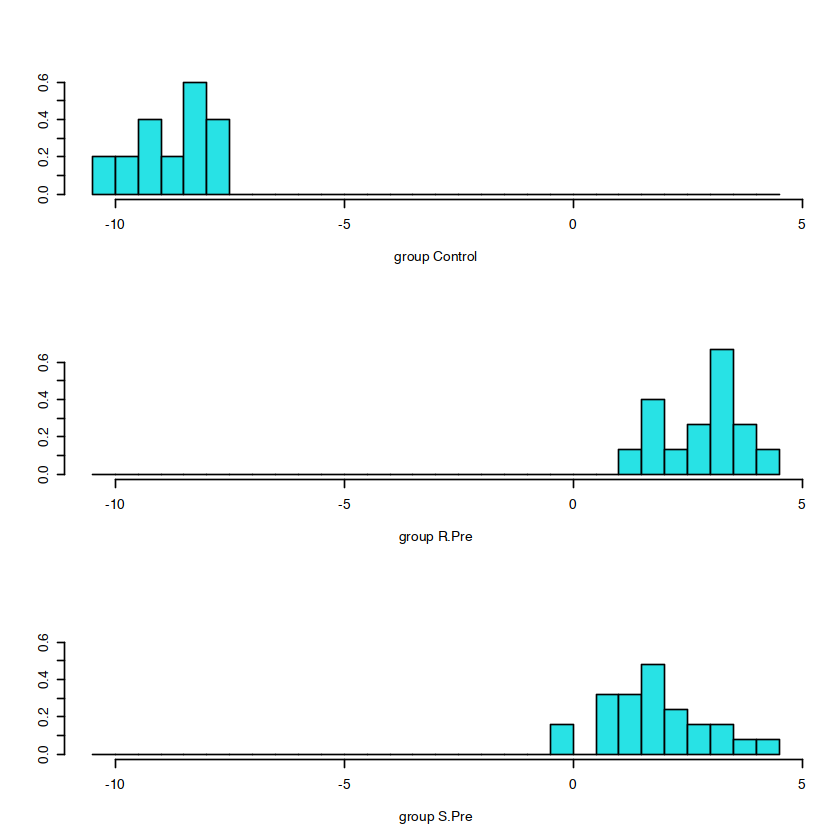

In [63]:
Term.predicted.lda <- predict(dfXy_Timing.lda,
    newdata = dfXy_Timing,
    method = 'plug-in', # "plug-in", "predictive", "debiased")
#    dimen = 3, # optional
    )

# also doing a sensitivity one (basically predicting all samples) which is needed for confusion matrix
#Timing.predicted.lda <- predict(dfXy_Timing.lda,
#    newdata = dfXy_Timing,
#    method = 'plug-in', # "plug-in", "predictive", "debiased")
#    dimen = 3, # optional
#    )

table(Term.predicted.lda$class) # troubleshoting
Term.predicted.lda # print
ldahist(Term.predicted.lda$x[,1], g = dfXy_Timing$Term)

A nice way of displaying the results of a linear discriminant analysis (LDA) is to plot the LDA scores as histograms or scatterplots. A stacked histogram shows the scores of the discriminant functions separately for each group.

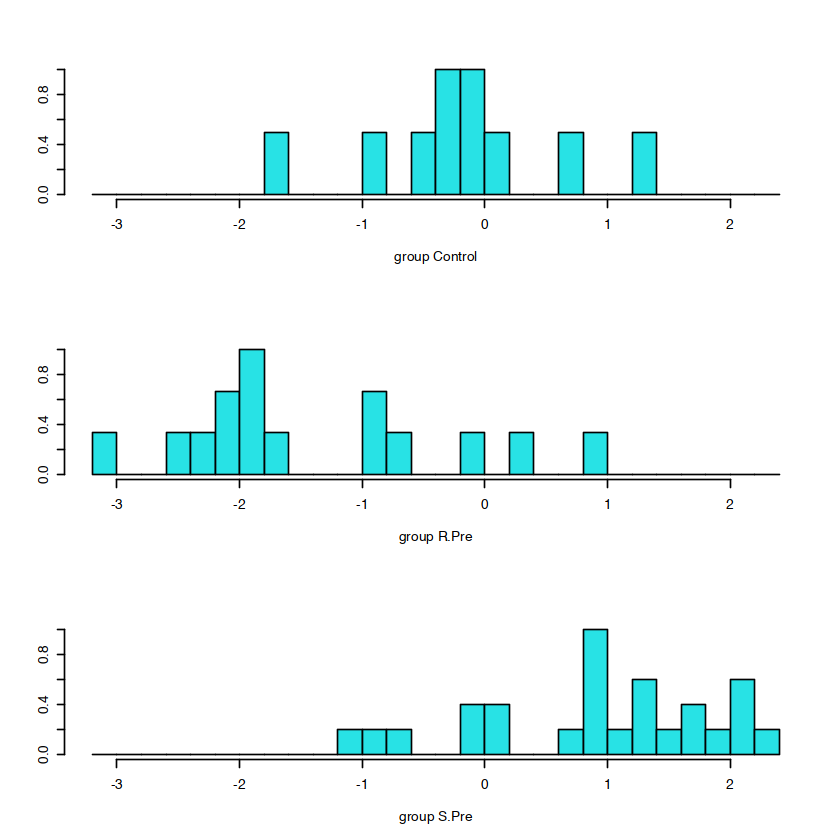

In [64]:
# g is "a factor or vector giving groups, of the same length as data."
ldahist(Term.predicted.lda$x[,2], g = dfXy_Timing$Term)

We can also produce a scatterplot showing how the groups separate along the LDA axes (below). LD1 separates taxum IV from the other taxa. LD2 separates well III from I and II. LD3 seems to separate taxum I from the other groups.

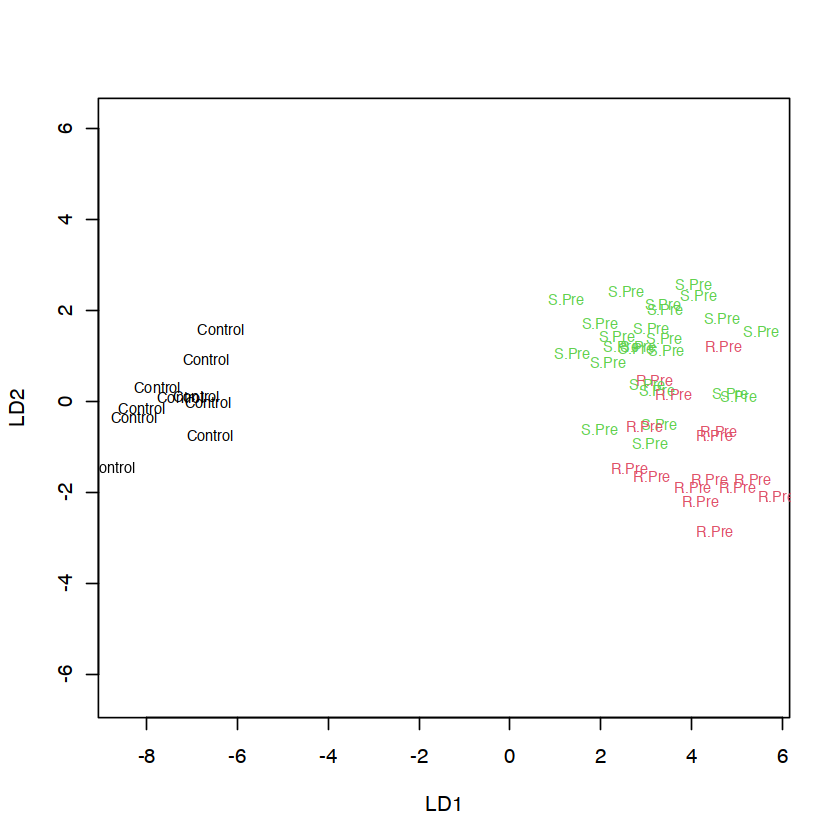

In [65]:
plot(dfXy_Timing.lda, col=as.numeric(dfXy_Timing$Term)) # assign color code based on factor code

We can glue together the posterior-probabilities and the predicted class vector (with cbind() to show for each row, the predicted class represents the class with the maximum posterior probability

In [66]:
i <- sample(10) # random row
head(cbind(round(Term.predicted.lda$posterior[i,], 4), class=Term.predicted.lda$class[i]))

,Control,R.Pre,S.Pre,class
1,0,0.1761,0.8239,3
8,0,0.9985,0.0015,2
4,0,0.8734,0.1266,2
10,0,0.0217,0.9783,3
9,0,0.0055,0.9945,3
6,0,0.0171,0.9829,3


The LDA scores (the transformed values in LDA space) for all observations can be accessed via $x:

In [67]:
head(Term.predicted.lda$x)

,LD1,LD2
1,1.8593622,0.01324711
2,1.9153709,-0.74147670
3,2.0420406,1.78929891
4,3.2245516,-0.89381181
5,2.8156055,-2.42358841
6,0.7815069,0.62895784


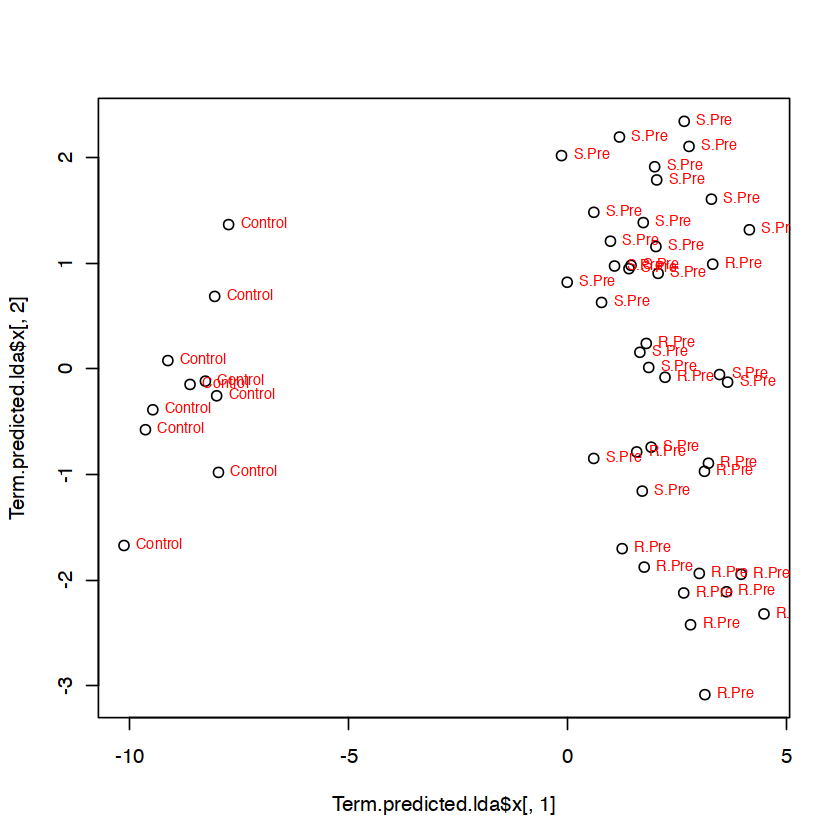

In [68]:
# Term.predicted.lda$x[,1] is the projections of the prediction
plot(Term.predicted.lda$x[,1], Term.predicted.lda$x[,2])
text(Term.predicted.lda$x[,1], Term.predicted.lda$x[,2], dfXy_Timing$Term, cex = 0.7, pos = 4, col = "red")

Saving 7 x 7 in image


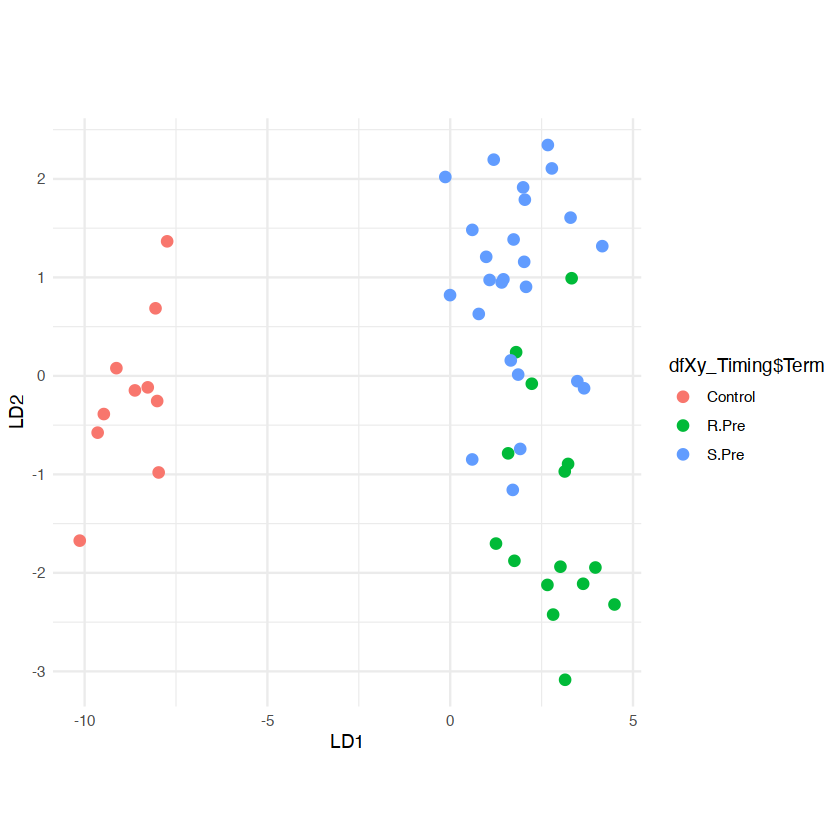

In [69]:
#convert to data frame 
newdata <- data.frame(type = dfXy_Timing[,1], lda = Term.predicted.lda$x)
ggplot(newdata) + geom_point(aes(lda.LD1, lda.LD2, colour = dfXy_Timing$Term), size = 2.5)+
  guides(fill = "none") + 
  labs(title = "", x = "LD1", y = "LD2") +
#  coord_fixed() +
  theme_minimal() +
  theme(aspect.ratio = 1)

ggsave(file.path("Protein/LDA/proteinLDA_ggplot_LD1-LD2_manual_Term_Testing.pdf"))

In [ ]:
#convert to data frame 
newdata <- data.frame(type = dfXy_Sensitivity[,1], lda = Sensitivity.predicted.lda$x)
ggplot(newdata) + geom_point(aes(lda.LD1, lda.LD2, colour = dfXy_Sensitivity$Sensitivity), size = 2.5)+
  guides(fill = "none") + 
  labs(title = "", x = "LD1", y = "LD2") +
#  coord_fixed() +
  theme_minimal() +
  theme(aspect.ratio = 1)

ggsave(file.path("Protein/LDA/proteinLDA_ggplot_LD1-LD2_manual_Sensitivity.pdf"))

ERROR: Error in data.frame(type = dfXy_Sensitivity[, 1], lda = Sensitivity.predicted.lda$x): object 'dfXy_Sensitivity' not found


In [ ]:
# plot LD1-LD3 if available

ggplot(newdata) + geom_point(aes(lda.LD1, lda.LD3, colour = dfXy_Sensitivity$Sensitivity), size = 2.5)+
  guides(fill = "none") + 
  labs(title = "", x = "LD1", y = "LD3") +
#  coord_fixed() +
  theme_minimal() +
  theme(aspect.ratio = 1)

ggsave(file.path("Protein/LDA/proteinLDA_ggplot_LD1-LD3_manual_Sensitivity.pdf"))

In [298]:
dfXy_Sensitivity_Scaling

,LD1,LD2
,<dbl>,<dbl>
P04217,0.510775583,0.777103558
P68133,0.955287691,-0.415011081
P60709,0.053439961,1.080868991
P43652,0.085005520,-0.005493817
P01019,-0.515999033,-0.195709537
P02765,-0.012042264,0.490250459
P02760,-0.325659851,0.268861605
Q8NI99,0.044671119,0.309612023
O15084,0.251237712,0.047896017


Warning message:
“ggrepel: 107 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Saving 7 x 7 in image

Warning message:
“ggrepel: 107 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


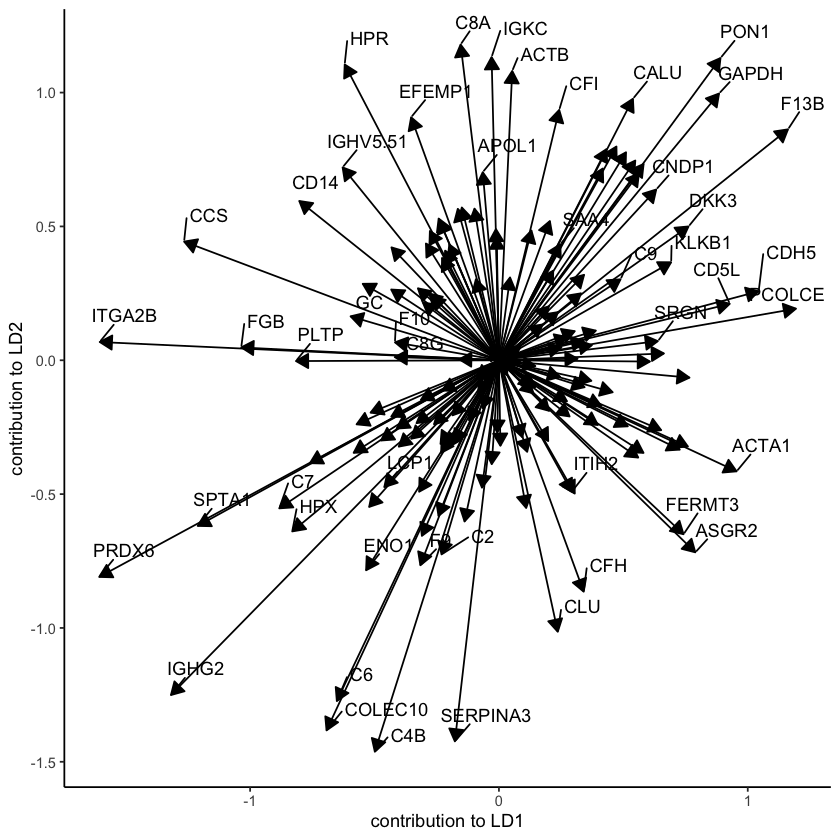

In [310]:
#plot scalings
library(ggrepel)

dfXy_Sensitivity_Scaling <-data.frame(dfXy_Sensitivity.lda$scaling) # ggplot needs a df
#dfXy_Sensitivity_Scaling$Proteins <- row.names(dfXy_Sensitivity_Scaling)

ggplot() + 
  geom_segment(data = dfXy_Sensitivity_Scaling, aes(x=0, xend=LD1, y=0, yend=LD2),
               arrow = arrow(length = unit(0.3, "cm"),type='closed'),
               colour="black") +
  labs(x = "contribution to LD1", y = "contribution to LD2") + # add axis labels
  #geom_text(data = dfXy_Sensitivity_Scaling, position=position_jitter(width=.3,height=.3), aes(x = LD1, y = LD2, label = rownames(dfXy_Sensitivity_Scaling)))+
  geom_text_repel(data = dfXy_Sensitivity_Scaling,
                  force = 1,
                  force_pull = 0, # don't pull towards datapoints
                  max.overlaps = 3,
#                  hjust = 0,
                  nudge_x = .1,
                  nudge_y = .1,
                  aes(x = LD1, y = LD2, label = rownames(dfXy_Sensitivity_Scaling))
                 )+
  theme_classic()                  # use a white theme for better contrast


#ggplot(dfXy_Sensitivity_Scaling, aes(x = LD1, y=LD2)) +
#  geom_line(arrow = arrow(length=unit(0.30,"cm"), ends="first", type = "closed"))
#  labs(title = "", x = "LD1", y = "LD2") +
#  coord_fixed() +
#  theme_minimal() +
#  theme(aspect.ratio = 1)

ggsave(file.path("Protein/LDA/proteinLDA_ggplot_LD1-LD2_manual_LoadingsPlot.pdf"))

## confusion matrix (training error)

* https://pages.cms.hu-berlin.de/EOL/gcg_quantitative-methods/Lab11_LDA_Model-assessment.html
* To check how well the model predicts our training data, we can construct a confusion matrix of the fitted vs observed Taxa using the table function.

In [300]:
#Using the predictin of all samples here (e.g. Sensitivity.predicted.lda$class)
#use lengths() for troublshooting if you have the corret lists (match by legnth)
conf <- table(list(predicted=Sensitivity.predicted.lda$class, observed=dfXy_Sensitivity$Sensitivity))
conf

           observed
predicted   Control Resistant Sensitive
  Control        10         0         0
  Resistant       0        30         0
  Sensitive       0         0        50

We can calculate the categorical accuracy measures using simple matrix arithmetic…

In [301]:
# Precision (Positive predicted value)
diag(conf) / rowSums(conf)

Control Resistant Sensitive 
        1         1         1

In [302]:
# Sensitivity
diag(conf) / colSums(conf)

Control Resistant Sensitive 
        1         1         1

Alternatively, the caret package includes functionality that makes this easier:

In [303]:
library(caret)
confusionMatrix(conf)

Confusion Matrix and Statistics

           observed
predicted   Control Resistant Sensitive
  Control        10         0         0
  Resistant       0        30         0
  Sensitive       0         0        50

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9598, 1)
    No Information Rate : 0.5556     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Control Class: Resistant Class: Sensitive
Sensitivity                  1.0000           1.0000           1.0000
Specificity                  1.0000           1.0000           1.0000
Pos Pred Value               1.0000           1.0000           1.0000
Neg Pred Value               1.0000           1.0000           1.0000
Prevalence                   0.1111           0.3333

## Confusion matrix (test error)

The previous error estimates show the training error. The lda() function also includes an easy way to estimate the test error using leave-one-out cross-validation by specifying CV=T.

In [304]:
# for accuracy, look more cells down

lda_model2 <- lda(Sensitivity ~ ., data=dfXy_Sensitivity, CV=T)
conf2 <- table(list(predicted=lda_model2$class, observed=dfXy_Sensitivity$Sensitivity))
confusionMatrix(conf2)

Warning message in lda.default(x, grouping, ...):
“variables are collinear”


Confusion Matrix and Statistics

           observed
predicted   Control Resistant Sensitive
  Control         2        17        16
  Resistant       3        11        11
  Sensitive       5         2        23

Overall Statistics
                                          
               Accuracy : 0.4             
                 95% CI : (0.2981, 0.5087)
    No Information Rate : 0.5556          
    P-Value [Acc > NIR] : 0.9989          
                                          
                  Kappa : 0.1164          
                                          
 Mcnemar's Test P-Value : 7.204e-05       

Statistics by Class:

                     Class: Control Class: Resistant Class: Sensitive
Sensitivity                 0.20000           0.3667           0.4600
Specificity                 0.58750           0.7667           0.8250
Pos Pred Value              0.05714           0.4400           0.7667
Neg Pred Value              0.85455           0.7077           0.5500
Prevale

## Validation Section #2
* from: https://rstudio-pubs-static.s3.amazonaws.com/386394_19c4d87014ec4d8c81d26bb1f8090bf7.html

In [305]:
lda.cm <- table(dfXy_Sensitivity$Sensitivity, Sensitivity.predicted.lda$class) # this miiiight be right too?
lda.cm <- table(dfXy_Term$Term, Term.predicted.lda$class) # this miiiight be right too?

#Clasification rate
LDA_model = lda.cm %>% prop.table() %>% round(3)
LDA_model

         
          Control Resistant Sensitive
  Control     0.2       0.0       0.0
  R.Pre       0.0       0.3       0.0
  S.Pre       0.0       0.0       0.5

In [306]:
#Confusion matrix
LDA_model = lda.cm
LDA_model

         
          Control Resistant Sensitive
  Control      10         0         0
  R.Pre         0        15         0
  S.Pre         0         0        25

## a different way to look at accuracy

In [307]:
library(caret)

dfXy_Sensitivity.lda.predict <- train(Sensitivity ~ ., method = "lda", data = dfXy_Sensitivity)
#dfXy_Sensitivity.lda.predict # print

#levels(predict(dfXy_Sensitivity.lda.predict, dfXy_Sensitivity)) # for troubleshooting
#table(predict(dfXy_Sensitivity.lda.predict, dfXy_Sensitivity))
#levels(dfXy_Sensitivity$Sensitivity) # for troubleshooting

confusionMatrix(data = dfXy_Sensitivity.lda.predict, reference = dfXy_Term$Term) #works
#confusionMatrix(data = dfXy_Sensitivity.lda.predict, reference = dfXy_Sensitivity$Sensitivity) #works

Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning mess

Bootstrapped (25 reps) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
           Reference
Prediction  Control Resistant Sensitive
  Control       9.6       0.2       0.4
  Resistant     0.2      17.8      10.8
  Sensitive     0.4      14.9      45.7
                            
 Accuracy (average) : 0.7308


In [ ]:
# Linear Discriminant Analysis with Jacknifed Prediction 
library(MASS)

# Load data
data(iris)

# A usual call to lda contains formula, data and prior arguments.
# The . in the formula argument means that we use all the remaining variables in data as covariates. The prior
#argument sets the prior probabilities of class membership. If unspecified, the class proportions for the training set are used.
# If present, the probabilities should be specified in the order of the factor levels.

r <- lda(formula = Species ~ ., 
         data = iris
         #prior = c(1,1,1)/3,
        )

As we can see above, a call to lda returns the prior probability of each class, the counts for each class in the data
, the class-specific means for each covariate, the linear combination coefficients (scaling) for each linear discriminant (remember that in this case with 3 classes we have at most two linear discriminants) and the singular values (svd) that gives the ratio of the between- and within-group standard deviations on the linear discriminant variables.

In [ ]:
r$prior

In [ ]:
r$counts

In [ ]:
r$means

In [ ]:
r$scaling

In [ ]:
r$svd

In [ ]:
prop = r$svd^2/sum(r$svd^2)
prop

We can use the singular values to compute the amount of the between-group variance that is explained by each linear discriminant. In our example we see that the first linear discriminant explains more than {99\%} of the between-group variance in the iris
dataset.

If we call lda with CV = TRUE, it uses a leave-one-out cross-validation and returns a named list with components:

    *class: the Maximum a Posteriori Probability (MAP) classification (a factor)
    *posterior: posterior probabilities for the classes.


In [ ]:
r2 <- lda(formula = Species ~ ., 
          data = iris, 
          prior = c(1,1,1)/3,
          CV = TRUE)

head(r2$class)

In [ ]:
head(r2$posterior, 3)

There is also a predict method implemented for lda objects. It returns the classification and the posterior probabilities of the new data based on the Linear Discriminant model. Below, I use half of the dataset to train the model and the other half is used for predictions.

In [ ]:
train <- sample(1:150, 75)
r3 <- lda(Species ~ ., # training model
         iris, 
         prior = c(1,1,1)/3, 
         subset = train)
plda = predict(object = r, # predictions
               newdata = iris[-train, ])
head(plda$class) # classification result

In [ ]:
head(plda$posterior, 3) # posterior prob.

In [ ]:
head(plda$x, 3) # LD projections

### LDA #5 I AM THE DISCRIMINANT
https://corybrunson.github.io/2019/08/02/lda/

example inputs and parameter settings

The code will be executed in sequence, punctuated by printouts and plots of key objects defined along the way. This requires assigning illustrative values to the function arguments. I’ll take as my example the famous diabetes data originally analyzed by Reaven and Miller (1979), available from the heplots package, which consists of a BMI-type measure and the results of four glucose and insulin tests for 145 patients, along with their diagnostic grouping as non-diabetic (“normal”), subclinically (“chemical”) diabetic, and overtly diabetic.4 For our purposes, the only other required parameter is tol, the tolerance at which small values encountered along the matrix algebra are interpreted as zero.

In [ ]:
library(heplots)

x <- heplots::Diabetes[, 1:5]
grouping <- heplots::Diabetes[, 6]
tol <- 1e-04

set.seed(2)
s <- sort(sample(nrow(x), 6))
print(x[s, ])

In [ ]:
print(grouping[s])

data parameters and summary information

The first several lines of lda.default() capture summary information about the data table x (and ensure that it is a matrix) and the group assignments grouping: n is the number of cases in x, p is the number of variables, g is grouping coerced to a factor-valued vector, lev is the vector of factor levels (groups), counts is a vector of the number of cases assigned to each group, proportions is a vector of their proportions of n, and ng is the number of groups.

It will help to keep track of some mathematical notation for these concepts in parallel: Call the data matrix X∈ℝn×p
, the column vector of group assignments g∈[q]n, and a diagonal matrix N∈ℕq×q of group counts n1,…,nq. Note that lev and ng correspond to [q] and q, respectively. Additionally let G=(δgi,k)∈{0,1}n×q denote the 0,1-matrix with i,k-th entry 1 when case i is assigned to group k. (I’ll use the indices 1≤i≤n for the cases, 1≤j≤p for the variables, and 1≤k≤q for the groups.)

In [ ]:
if(is.null(dim(x))) stop("'x' is not a matrix")
x <- as.matrix(x)
if(any(!is.finite(x)))
  stop("infinite, NA or NaN values in 'x'")
n <- nrow(x)
p <- ncol(x)
if(n != length(grouping))
  stop("nrow(x) and length(grouping) are different")
g <- as.factor(grouping)
lev <- lev1 <- levels(g)
counts <- as.vector(table(g))
# excised handling of `prior`
if(any(counts == 0L)) {
  empty <- lev[counts == 0L]
  warning(sprintf(ngettext(length(empty),
                           "group %s is empty",
                           "groups %s are empty"),
                  paste(empty, collapse = " ")), domain = NA)
  lev1 <- lev[counts > 0L]
  g <- factor(g, levels = lev1)
  counts <- as.vector(table(g))
}
proportions <- counts/n
ng <- length(proportions)
names(counts) <- lev1 # `names(prior)` excised

The steps are straightforward, with the exception of the handling of prior probabilities (prior), which is beyond our scope and which i’ve excised from the code. (When not provided, prior takes the default value proportions, which are explicitly defined within lda.default() and will be substituted for prior below.) If grouping is a factor that is missing elements of any of its levels, then these elements are removed from the analysis with a warning. I’ll also skip the lines relevant only to cross-validation (CV = TRUE), which include a compatibility check here and a large conditional chunk later on.

In [ ]:
# group counts and proportions of the total:
print(cbind(counts, proportions))

variable standardization and the correlation matrix

Next, we calculate the group centroids X⎯⎯⎯⎯=N−1G⊤X∈ℝq×p
and the within-group covariance matrix CW=1nX0⊤X0, where X0=X−GX⎯⎯⎯⎯ consists of the differences between the cases (rows of X) and their corresponding group centroids. lda.default() stores X⎯⎯⎯⎯ as group.means and the square roots of the diagonal entries of CW—that is, the standard deviations—as f1. The conditional statement requires that at least some variances be nonzero, up to the tolerance threshold tol. Finally, scaling is initialized as a diagonal matrix S0 of inverted variable standard deviations 1σj.

In [ ]:
## drop attributes to avoid e.g. matrix() methods
group.means <- tapply(c(x), list(rep(g, p), col(x)), mean)
f1 <- sqrt(diag(var(x - group.means[g,  ])))
if(any(f1 < tol)) {
  const <- format((1L:p)[f1 < tol])
  stop(sprintf(ngettext(length(const),
                        "variable %s appears to be constant within groups",
                        "variables %s appear to be constant within groups"),
               paste(const, collapse = " ")),
       domain = NA)
}
# scale columns to unit variance before checking for collinearity
scaling <- diag(1/f1, , p)

I’ll refer to X0 as the “within-group centered data”. The group centroids are returned as the named member means of the ‘lda’-class object returned by lda.default(). The standard deviations of and correlations among (some of) the five variables are evident in their pairwise scatterplots, which here and forward fix the aspect ratio at 1:

In [ ]:
# group centroids
print(group.means)

In [ ]:
# within-group centered data
pairs(x - group.means[g, ], asp = 1, pch = 19, cex = .5)

In [ ]:
# within-group standard deviations
print(f1)

In [ ]:
# inverses of within-group standard deviations
scaling0 <- scaling
print(scaling0)

The object scaling will be redefined twice as the function proceeds, each time by multiplication on the right, concluding with the member named scaling of the ‘lda’ object. We’ll denote these redefinitions S1 and S2 and store the three definitions as scaling0, scaling1, and scaling2 for unambiguous illustrations. These matrices act on the columns of X0, which induces a two-sided action on CW: 1n(X0S)⊤(X0S)=S⊤CWS. The effect of S0 is to standardize the variables, so that the covariance matrix of the transformed data X0S0 is the within-group correlation matrix RW of X0. The effect is also evident from a comparison of the pairwise scatterplots:

In [ ]:
# within-group correlation matrix
print(cor(x - group.means[g, ]))

In [ ]:
# within-group covariance matrix after standardization
print(cov((x - group.means[g, ]) %*% scaling))

In [ ]:
# within-group centered data after standardization
pairs((x - group.means[g, ]) %*% scaling, asp = 1, pch = 19, cex = .5)

variable sphering and the Mahalanobis distance

The next step in the procedure is the signature transformation of LDA. Whereas S0
removes the scales of the variables, leaving them each with unit variance but preserving their correlations, the role of S1 is to additionally remove these correlations. Viewing the set of cases within each group as a cloud of nk points in ℝp, S0 stretches or compresses each cloud along its coordinate axes, while S1 will stretch or compress it along its principal components. The resulting aggregate point cloud will have within-group covariance In (the identity matrix), indicating unit variance and no correlation among its variables; according to these summary statistics, then, it is rotationally symmetric. Accordingly, the column action of S1

is called a sphering transformation, while the distances among the transformed points are called their Mahalanobis distances after their originator. See this SO answer by whuber for a helpful illustration of the transformation. Its importance is illustrated in Chapter 11 of Greenacre’s Biplots in Practice (p. 114).

S1
is calculated differently for different choices of method (see the documentation ?MASS::lda). For simplicity, the code chunk below follows the "mle" method. As hinted in the previous paragraph, the process of obtaining a sphering transformation is closely related to principal components analysis. One can be calculated via eigendecomposition of the standardized within-group covariance matrix or, equivalently, via singular value decomposition of the standardized within-group centered data X̂ =X0S0.5 lda.default() performs SVD on X̂ , scaled by 1n√ so that the scatter matrix is RW:

In [ ]:
fac <- 1/n # excise conditional case `method == "moment"`
X <- sqrt(fac) * (x - group.means[g,  ]) %*% scaling
X.s <- svd(X, nu = 0L)
rank <- sum(X.s$d > tol)
if(rank == 0L) stop("rank = 0: variables are numerically constant")
if(rank < p) warning("variables are collinear")
scaling <- scaling %*% X.s$v[, 1L:rank] %*% diag(1/X.s$d[1L:rank],,rank)

Taking the SVD to be 1n√X̂ =Û D̂ V̂ ⊤, the sphering matrix is S1=S0V̂ D̂ −1. The alternative calculation is S1=S0V̂ Λ̂ −1/2, where Ĉ =V̂ Λ̂ V̂ ⊤ is the eigendecomposition of the covariance matrix of X̂  so that V̂  is the same and Λ̂ =D̂ 1/2. (Ĉ −1/2=V̂ Λ̂ −1/2V̂ ⊤ is called the symmetric square root of Ĉ .) Note that the signs of the columns are arbitrary, as in PCA. The difference in absolute values is due to stats::cov() treating X̂  as a sample rather than a population, dividing the scatter matrix X̂ ⊤X̂  by 1n−1 rather than by 1n.

In [ ]:
# standardized within-group centered data
Xhat <- (x - group.means[g,  ]) %*% scaling0

# eigendecomposition of covariance
E <- eigen(cov(Xhat))

# sphering matrix (alternative calculation)
scaling0 %*% E$vectors %*% diag(1/sqrt(E$values))

In [ ]:
# sphering matrix
scaling1 <- scaling
print(scaling1)

The sphered within-group centered data now have identity within-group covariance matrix, up to a reasonable tolerance. The sphered coordinates are true to their name, as along each pair of variable coordinates the point cloud exhibits no elliptical tendencies. While rank is 5 (=p) at this stage, indicating that variation is detected in each of the variables, the final computational step will determine the rank of the LDA itself in terms of the transformed group centroids.

In [ ]:
# within-group covariance matrix after sphering
print(cov((x - group.means[g, ]) %*% scaling))

In [ ]:
# within-group centered data after sphering
pairs((x - group.means[g, ]) %*% scaling, asp = 1, pch = 19, cex = .5)

In [ ]:
# number of variables that contribute to the sphered data
print(rank)

sphering-transformed group centroids and discriminant coefficients

The original problem of LDA was to eigendecompose CW−1CB
, where CB=1qY⊤Y is the between-groups covariance matrix derived from the centered group centroids Y=GX⎯⎯⎯⎯−𝟙n×1x⎯⎯⎯∈ℝn×p using the data centroid x⎯⎯⎯=1n𝟙1×nX∈ℝ1×p (and duplicated according to the group counts). lda.default() relies on an equivalent calculation CB=1qY⎯⎯⎯⎯⊤Y⎯⎯⎯⎯, using Y⎯⎯⎯⎯=N(X⎯⎯⎯⎯−𝟙q×1x⎯⎯⎯), which explicitly weights the centered group centroids by the group counts and produces the same scatter matrix as Y. Under the transformed coordinates X0S1, the matrix quotient to be eigendecomposed becomes
(S1⊤CWS1)−1(S1⊤CBS1)=IpS1⊤CBS1=1q(YS1)⊤(YS1)=1q(Y⎯⎯⎯⎯S1)⊤(Y⎯⎯⎯⎯S1),
the between-groups covariance calculated from the sphering-transformed centered group centroids.6 This is the first calculation using CB, which is how lda.default() can wait until here to calculate the data centroid xbar.

In [ ]:
xbar <- colSums(proportions %*% group.means) # sub `proportions` for `prior`
fac <- 1/(ng - 1) # excise conditional case `method == "mle"`
X <- sqrt((n * proportions)*fac) * # sub `proportions` for `prior`
  scale(group.means, center = xbar, scale = FALSE) %*% scaling
X.s <- svd(X, nu = 0L)
rank <- sum(X.s$d > tol * X.s$d[1L])
if(rank == 0L) stop("group means are numerically identical")
scaling <- scaling %*% X.s$v[, 1L:rank]
# excise conditional case `is.null(dimnames(x))`
dimnames(scaling) <- list(colnames(x), paste("LD", 1L:rank, sep = ""))
dimnames(group.means)[[2L]] <- colnames(x)

The rank now indicates the number of dimensions in the SVD of the sphering-transformed group centroids, which can be no more than q−1. The final reassignment of scaling gives S2, the raw discriminant coefficients that express the discriminant coordinates of the centroids (and of the original data) as linear combinations of the centered variable coordinates. In practice, these discriminant coordinates are returned by the predict() method for ‘lda’ objects, MASS:::predict.lda(), and this is demonstrated to conclude the post:

In [ ]:
# number of dimensions in the sphering-transformed group centroid SVD
print(rank)

In [ ]:
# discriminant coefficients
scaling2 <- scaling
print(scaling2)

In [ ]:
# discriminant coordinates of centered group centroids
print((group.means - matrix(1, ng, 1) %*% t(xbar)) %*% scaling2)

In [ ]:
# as recovered using `predict.lda()`
fit <- MASS::lda(group ~ ., heplots::Diabetes)
print(predict(fit, as.data.frame(fit$means))$x)

## LDA #6 using MASS
* https://rpubs.com/ifn1411/LDA

In [ ]:
library(MASS)
library(car)

#search for pre-installed database
data(wine, package = 'rattle.data')
attach(wine)
head(wine)

In [ ]:
str(wine)

In [ ]:
scatterplotMatrix(wine[2:6])

In [ ]:
wine.lda <- lda(Type ~., data = wine) # this separates by the Type column
wine.lda

The linear discriminant function from the result in above is:

−.403∗Alcohol+0.165∗Malic−0.369∗Ash+0.155∗Alcalinity−0.002∗Magnesium+0.618∗Phenols−1.66∗Flavanoids−1.496∗Nonflavanoids+0.134∗Proanthocyanins+0.355∗Color−0.818∗Hue−1.15∗Dilution−0.003∗Proline

The “proportion of trace”" that is printed when you type wine.lda (the variable returned by the lda() function) is the percentage separation achieved by each discriminant function. For example, for the wine data we get the same values as just calculated (68.75% and 31.25%).

### Stacked Histogram of the LDA Values

Histogram is a nice way to displaying result of the linear discriminant analysis.We can do using ldahist() function in R. Make prediction value based on LDA function and store it in an object. predict function generate value from selected model function. The length of the value predicted will be correspond with the length of the processed data.

In [ ]:
wine.lda.values <- predict(wine.lda)
wine.lda.values
ldahist(wine.lda.values$x[,1], g = Type)

second discriminant function separates those cultivars, by making a stacked histogram of second discriminant function’s values

In [ ]:
ldahist(wine.lda.values$x[,2], g = Type)

### Scatterplot of Discriminant Function

Now we can produce scatter plot of the two discriminant function:

In [ ]:
plot(wine.lda.values$x[,1], wine.lda.values$x[,2])
text(wine.lda.values$x[,1], wine.lda.values$x[,2], Type, cex = 0.7, pos = 4, col = "red")

For more advanced graphic, we use ggplot2 package. ggplot2 package only can deal with data frame object. Create new object contain type variable from wine data, and value from wine.lda.values.

In [ ]:
#convert to data frame 
newdata <- data.frame(type = wine[,1], lda = wine.lda.values$x)
library(ggplot2)
ggplot(newdata) + geom_point(aes(lda.LD1, lda.LD2, colour = type), size = 2.5)

### Prediction Accuracy
Prediction accuracy of LDA is comparing prediction result from the model output with the actual data. First step, activate caret package. Then, create prediction result using train function. We will use confusionMatrix command to see the prediction accuracy of the model.

In [ ]:
library(caret)

In [ ]:
wine.lda.predict <- train(Type ~ ., method = "lda", data = wine)
confusionMatrix(wine$Type, predict(wine.lda.predict, wine))

Other visualization tool using klaR package.

In [ ]:
library(klaR)
partimat(Type ~ Alcohol + Alcalinity, data = wine, method = "lda")

You can add more variable to examine other variables to the wine type classification

In [ ]:
partimat(Type ~ Alcohol + Alcalinity + Ash + Magnesium, data = wine, method = "lda")

In [42]:
library(ISLR);
(default <- as_tibble(ISLR::Default))

default,student,balance,income
<fct>,<fct>,<dbl>,<dbl>
No,No,729.5265,44361.625
No,Yes,817.1804,12106.135
No,No,1073.5492,31767.139
No,No,529.2506,35704.494
No,No,785.6559,38463.496
No,Yes,919.5885,7491.559
No,No,825.5133,24905.227
No,Yes,808.6675,17600.451
No,No,1161.0579,37468.529


In [43]:
attach(default)

The following object is masked _by_ .GlobalEnv:

    default




In [44]:
set.seed(123)
trainIndex <- createDataPartition(default$default,
                                  p=0.6,
                                  list = FALSE,
                                  times = 1)
train <- default[trainIndex, ]
test  <- default[-trainIndex,]

In [56]:
(lda.m1 <- lda(default~balance + student, data = train))

Call:
lda(default ~ balance + student, data = train)

Prior probabilities of groups:
        No        Yes 
0.96667222 0.03332778 

Group means:
      balance studentYes
No   808.8574  0.2939148
Yes 1726.3472  0.3750000

Coefficients of linear discriminants:
                    LD1
balance     0.002243297
studentYes -0.255421132

The LDA output indicates that our prior probabilities are No = 0.967 and Yes = 0.033; in other words, 96.7% of the training observations are customers who did not default and 3% represent those that defaulted.

It also provides the group means; these are the average of each predictor within each class, and are used by LDA as estimates.
These suggest that customers that tend to default have, on average, a credit card balance of $1,730 and are more likely to be students then non-defaulters (30% of non-defaulters are students whereas 37% of defaulters are students).

The coefficients of linear discriminants output provides the linear combination of balance and studentYes that are used to form the LDA decision rule.

If 0.0022 × balance ??? 0.324 × studentYes is large, then the LDA classifier will predict that the customer will default, and if it is small, then the LDA classifier will predict the customer will not default.

We can use plot to produce plots of the linear discriminants, obtained by computing 0.0022 × balance ??? 0.324 × student for each of the training observations. As you can see, when 0.0022×balance ??? 0.324×student < 0 the probability increases that the customer will not default and
when 0.0022×balance ??? 0.324×student > 0 the probability increases that the customer will default.

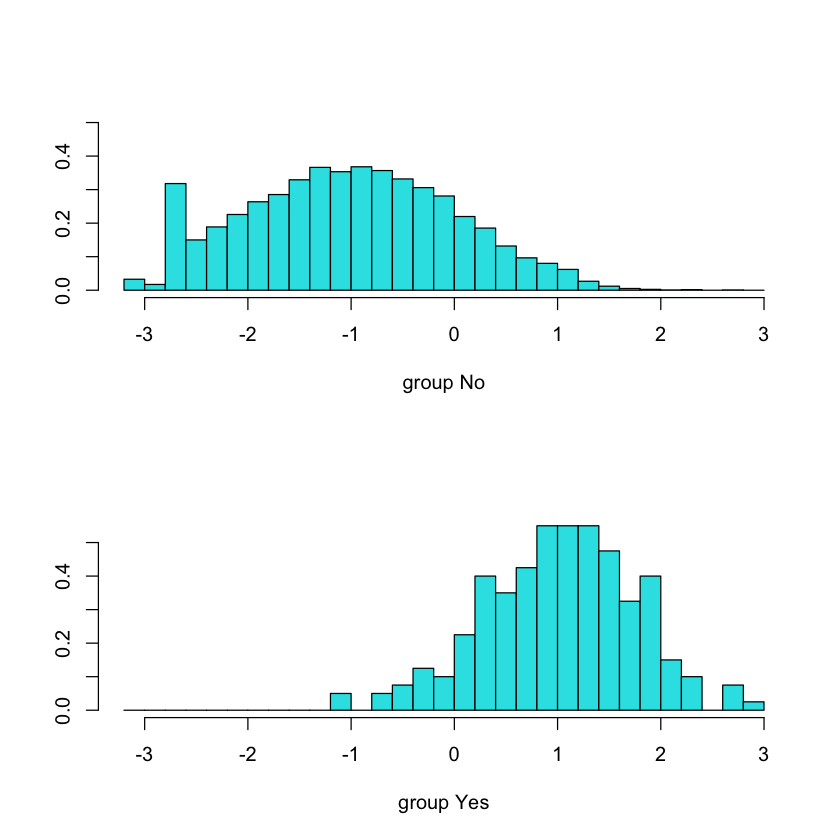

In [57]:
plot(lda.m1)

## Prediction

In [58]:
test.predicted.lda <- predict(lda.m1, newdata = test)

## Validation

In [59]:
lda.cm <- table(test$default, test.predicted.lda$class)

#Clasification rate
LDA_model = lda.cm %>% prop.table() %>% round(3)
LDA_model

     
         No   Yes
  No  0.964 0.003
  Yes 0.024 0.009

First we’ll look at the confusion matrix in a percentage form. The results show that the models perform in a very similar to Logistic regression model.
> 96% are true negatives and
> 1% are true positives. > Type II error is less than 3% in which the model predicts the customer will not default but they actually did. > Type I error of less than 1% in which the models predict the customer will default but they never did.

In [60]:
#Misclasification rate
lda.pred = (test.predicted.lda$class)
lda.error = mean(default$default != lda.pred)
lda.error

Warning message in `!=.default`(default$default, lda.pred):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”


[1] 0.045

### the overall error rate = 4.4%

In [61]:
#Confusion matrix
LDA_model = lda.cm
LDA_model

     
        No  Yes
  No  3856   10
  Yes   96   37

Precision: LDA model: 35/(98+35) = 26.31%
(Logistic regression model precision was 34%)
Specificity: LDA model: 1-(12/(3854+12)) = 99.7%
(Logistic regression model specificity was 99.5%)

The credit card company is likely to be more concerned with sensititivy since they want to reduce their risk.

If we are concerned with increasing the precision of our model we can tune our model by adjusting the posterior probability threshold. For instance, we might label any customer with a posterior probability of default above 20% as high-risk.

In [2]:
# testing below

library(proteoQDA)
copy_refseq_hs("~/proteoQ/dbs/fasta/refseq")
copy_refseq_mm("~/proteoQ/dbs/fasta/refseq")

In [3]:
dat_dir <- "~/proteoQ/examples"
copy_mascot_gtmt(dat_dir)

In [4]:
copy_exptsmry_gtmt(dat_dir)
copy_fracsmry_gtmt(dat_dir)

[1] FALSE

[1] FALSE

In [5]:
library(proteoQ)
load_expts("~/proteoQ/examples")

In [6]:
# columns keys in PSM files suitable for varargs of `filter_`
#
# (need utility `join_mgfs` with MSGF+ outputs)

normPSM(
  group_psm_by = pep_seq_mod, 
  group_pep_by = gene, 
  fasta = c("~/proteoQ/dbs/fasta/refseq/refseq_hs_2013_07.fasta", 
            "~/proteoQ/dbs/fasta/refseq/refseq_mm_2013_07.fasta"), 
  rptr_intco = 1000,
  rm_craps = TRUE,
  rm_krts = FALSE,
  rm_outliers = FALSE, 
  annot_kinases = TRUE, 
  plot_rptr_int = TRUE, 
  plot_log2FC_cv = TRUE, 
  
  filter_psms = rlang::exprs(pep_expect <= .1, pep_score >= 15), 
  filter_more_psms = rlang::exprs(pep_rank == 1),
)

Primary column keys in "F[...].csv" for "filter_" varargs.

At acc_type = "other_acc":
 the number of entries in FASTA: 56673
 the number of entries matched: 5
 percent annotated: 0.000

At acc_type = "refseq_acc":
 the number of entries in FASTA: 56673
 the number of entries matched: 15333
 percent annotated: 0.271



In [7]:
normPSM(
  filter_psms_at = rlang::exprs(pep_expect <= .1, pep_score >= 15, pep_rank == 1), 
  ..., 
)

ERROR: Error in eval(expr, envir, enclos): '...' used in an incorrect context


In [ ]:
# `PEP` and `Mass analyzer` are column keys in MaxQuant PSM tables
normPSM(
  filter_psms_at = rlang::exprs(PEP <= 0.1, `Mass analyzer` == "FTMS"), 
  ..., 
)

# `Expectation` and `Retention` are column keys in MSFragger PSM tables
normPSM(
  filter_psms_at = rlang::exprs(Expectation <= 0.1, Retention >= 50), 
  ..., 
)

# `score` is a column key in Spectrum Mill PSM tables
normPSM(
  filter_psms_at = rlang::exprs(score >= 10), 
  ..., 
)

In [ ]:
purgePSM ()

In [ ]:
purgePSM (
  max_cv = 0.5,
)

In [ ]:
PSM2Pep(
  filter_ms1int = rlang::exprs(pep_tot_int >= 1E4)
)

In [ ]:
mergePep(
  filter_peps_by = rlang::exprs(pep_len <= 100),
)

In [ ]:
standPep(
  range_log2r = c(10, 90), 
  range_int = c(5, 95),   
  method_align = MGKernel, 
  n_comp = 3, 
  seed = 749662, 
  maxit = 200, 
  epsilon = 1e-05, 
)

In [ ]:
# without scaling
pepHist(
  scale_log2r = FALSE, 
  ncol = 10,
)

# with scaling  
pepHist(
  scale_log2r = TRUE, 
  ncol = 10,
)

In [ ]:
# without scaling 
pepHist(
  scale_log2r = FALSE, 
  col_select = BI_1,
  ncol = 5,
  filename = bi1_n.png, 
)

# with scaling 
pepHist(
  scale_log2r = TRUE, 
  col_select = BI_1,
  ncol = 5,
  filename = bi1_z.png, 
)

In [ ]:
Pep2Prn()

In [8]:
standPrn(
  range_log2r = c(10, 90), 
  range_int = c(5, 95),   
  method_align = MGKernel, 
  n_comp = 2, 
  seed = 749662, 
  maxit = 200, 
  epsilon = 1e-05, 
  slice_prots_by = rlang::exprs(prot_n_pep >= 2),
)

Primary column keys in `Protein/Protein.txt` for `slice_` varargs.

method_align = MGKernel

n_comp = 2

col_select = Sample_ID



In [9]:
# without scaling
prnHist(
  scale_log2r = FALSE, 
  col_select = BI_1,
  ncol = 5,
  filename = bi1_n.png, 
)

# with scaling
prnHist(
  scale_log2r = TRUE, 
  col_select = BI_1,
  ncol = 5,
  filename = bi1_z.png, 
)

Primary column keys in `Protein/Protein.txt` for `filter_` varargs.

Primary file loaded: ~/proteoQ/examples/Protein/Protein.txt


scale_log2r = FALSE

impute_na = FALSE

complete_cases = FALSE

Primary column keys in `Protein/Protein.txt` for `filter_` varargs.

Primary file loaded: ~/proteoQ/examples/Protein/Protein.txt


scale_log2r = TRUE

impute_na = FALSE

complete_cases = FALSE



In [10]:
scale_log2r <- TRUE

In [11]:
# new `JHU` subset
pepMDS(
  col_select = JHU,
  col_fill = Shape, # WHIMs  
  col_size = Alpha, # batches
  filename = new_jhu.png,
  show_ids = FALSE,
  height = 3,
  width = 8,
)

Primary column keys in `Model/Peptide[_impNA_pVals].txt` for `filter_` varargs.

Primary file loaded: ~/proteoQ/examples/Peptide/Model/Peptide_pVals.txt


scale_log2r = TRUE

impute_na = FALSE

complete_cases = FALSE

Warning message:
“columns with all-NA values for aesthetics excluded: 
RAW_File, Select_sub, BI, PNNL, BI_1, BI_2, PNNL_1, PNNL_2, Fill, Size, Duplicate, Benchmark, Peptide_Yield, Viability.
”
Warning message:
“Columns at a single-factor level for aesthetics excluded: 
LCMS_Injection, Reference, JHU, Color.
”
Warning message:
“Using size for a discrete variable is not advised.”
Warning message:
“Using size for a discrete variable is not advised.”


In [12]:
prnPCA(
  col_select = Select, 
  show_ids = FALSE, 
  filename = cent.png,
)

Primary column keys in `Model/Protein[_impNA_pVals].txt` for `filter_` varargs.

Primary file loaded: ~/proteoQ/examples/Protein/Model/Protein_pVals.txt


scale_log2r = TRUE

impute_na = FALSE

complete_cases = FALSE

Warning message:
“Coerce `complete_cases = TRUE` at `impute_na = FALSE`.”
Warning message:
“columns with all-NA values for aesthetics excluded: 
RAW_File, Fill, Size, Duplicate, Benchmark, Peptide_Yield, Viability.
”
Warning message:
“Columns at a single-factor level for aesthetics excluded: 
LCMS_Injection, Reference.
”
Warning message:
“Using alpha for a discrete variable is not advised.”
Saving 7 x 7 in image
Warning message:
“Using alpha for a discrete variable is not advised.”


In [13]:
prnHM(
  xmin = -1, 
  xmax = 1, 
  xmargin = 0.1, 
  annot_cols = c("Group", "Color", "Alpha", "Shape"), 
  annot_colnames = c("Group", "Lab", "Batch", "WHIM"), 
  cluster_rows = FALSE, 
  annot_rows = c("kin_class"), 
  show_rownames = TRUE, 
  show_colnames = TRUE, 
  fontsize_row = 2, 
  cellheight = 2, 
  cellwidth = 14, 
  filter_kin = rlang::exprs(kin_attr == TRUE, species == "human"),
  arrange_kin = rlang::exprs(kin_order, gene),
  filename = "hukin_by_class.png", 
)

Primary column keys in `Model/Protein[_impNA_pVals].txt` for `filter_` varargs.

Primary file loaded: ~/proteoQ/examples/Protein/Model/Protein_pVals.txt


scale_log2r = TRUE

impute_na = FALSE

complete_cases = FALSE

No column-ordering of samples at `cluster_cols = TRUE`.



In [20]:
# impute NA
pepImp(m = 2, maxit = 2)
prnImp(m = 5, maxit = 5)

File loaded: ~/proteoQ/examples/Peptide/Peptide.txt




 iter imp variable
  1   1  N_log2_R126..W2.BI.TR1.TMT1.  N_log2_R127N..W16.BI.TR1.TMT1.  N_log2_R127C..W2.BI.TR2.TMT1.  N_log2_R128N..W2.BI.TR3.TMT1.  N_log2_R128C..W16.BI.TR2.TMT1.  N_log2_R129N..W2.BI.TR4.TMT1.  N_log2_R129C..W16.BI.TR3.TMT1.  N_log2_R130N..W16.BI.TR4.TMT1.  N_log2_R130C..W2.BI.TR5.TMT1.  N_log2_R131..W16.BI.TR5.TMT1.  N_log2_R126..W2.BI.TR1.TMT2.  N_log2_R127N..W16.BI.TR1.TMT2.  N_log2_R127C..W2.BI.TR2.TMT2.  N_log2_R128N..W2.BI.TR3.TMT2.  N_log2_R128C..W16.BI.TR2.TMT2.  N_log2_R129N..W2.BI.TR4.TMT2.  N_log2_R129C..W16.BI.TR3.TMT2.  N_log2_R130N..W16.BI.TR4.TMT2.  N_log2_R130C..W2.BI.TR5.TMT2.  N_log2_R131..W16.BI.TR5.TMT2.  N_log2_R126..W2.JHU.TR1.TMT1.  N_log2_R127N..W16.JHU.TR1.TMT1.  N_log2_R127C..W2.JHU.TR2.TMT1.  N_log2_R128N..W2.JHU.TR3.TMT1.  N_log2_R128C..W16.JHU.TR2.TMT1.  N_log2_R129N..W2.JHU.TR4.TMT1.  N_log2_R129C..W16.JHU.TR3.TMT1.  N_log2_R130N..W16.JHU.TR4.TMT1.  N_log2_R130C..W2.JHU.TR5.TMT1.  N_log2_R131..W16.JHU.TR5.TMT1.  N_log2_R126..W2.JHU.TR

File loaded: ~/proteoQ/examples/Protein/Protein.txt




 iter imp variable
  1   1  N_log2_R126..W2.BI.TR1.TMT1.  N_log2_R127N..W16.BI.TR1.TMT1.  N_log2_R127C..W2.BI.TR2.TMT1.  N_log2_R128N..W2.BI.TR3.TMT1.  N_log2_R128C..W16.BI.TR2.TMT1.  N_log2_R129N..W2.BI.TR4.TMT1.  N_log2_R129C..W16.BI.TR3.TMT1.  N_log2_R130N..W16.BI.TR4.TMT1.  N_log2_R130C..W2.BI.TR5.TMT1.  N_log2_R131..W16.BI.TR5.TMT1.  N_log2_R126..W2.BI.TR1.TMT2.  N_log2_R127N..W16.BI.TR1.TMT2.  N_log2_R127C..W2.BI.TR2.TMT2.  N_log2_R128N..W2.BI.TR3.TMT2.  N_log2_R128C..W16.BI.TR2.TMT2.  N_log2_R129N..W2.BI.TR4.TMT2.  N_log2_R129C..W16.BI.TR3.TMT2.  N_log2_R130N..W16.BI.TR4.TMT2.  N_log2_R130C..W2.BI.TR5.TMT2.  N_log2_R131..W16.BI.TR5.TMT2.  N_log2_R126..W2.JHU.TR1.TMT1.  N_log2_R127N..W16.JHU.TR1.TMT1.  N_log2_R127C..W2.JHU.TR2.TMT1.  N_log2_R128N..W2.JHU.TR3.TMT1.  N_log2_R128C..W16.JHU.TR2.TMT1.  N_log2_R129N..W2.JHU.TR4.TMT1.  N_log2_R129C..W16.JHU.TR3.TMT1.  N_log2_R130N..W16.JHU.TR4.TMT1.  N_log2_R130C..W2.JHU.TR5.TMT1.  N_log2_R131..W16.JHU.TR5.TMT1.  N_log2_R126..W2.JHU.TR

In [21]:
# significance tests
pepSig(
  W2_bat = ~ Term["W2.BI.TMT2-W2.BI.TMT1", 
                  "W2.JHU.TMT2-W2.JHU.TMT1", 
                  "W2.PNNL.TMT2-W2.PNNL.TMT1"], # batches
  W2_loc = ~ Term_2["W2.BI-W2.JHU", 
                    "W2.BI-W2.PNNL", 
                    "W2.JHU-W2.PNNL"], # locations
  W16_vs_W2 = ~ Term_3["W16-W2"], # types
)

# formulas matched to pepSig
prnSig()

# volcano plots
pepVol()
prnVol()

Primary column keys in `Peptide/Peptide[_impNA].txt` for `filter_` varargs.

Primary file loaded: ~/proteoQ/examples/Peptide/Peptide.txt


scale_log2r = TRUE

impute_na = FALSE

complete_cases = FALSE


contrs: W2.BI.TMT2-W2.BI.TMT1W2.JHU.TMT2-W2.JHU.TMT1W2.PNNL.TMT2-W2.PNNL.TMT1


new_contrs: W2.BI.TMT2-W2.BI.TMT1W2.JHU.TMT2-W2.JHU.TMT1W2.PNNL.TMT2-W2.PNNL.TMT1


elements: W2.BI.TMT2, W2.JHU.TMT2, W2.PNNL.TMT2, W2.BI.TMT1, W2.JHU.TMT1, W2.PNNL.TMT1


new_elements: W2.BI.TMT2, W2.JHU.TMT2, W2.PNNL.TMT2, W2.BI.TMT1, W2.JHU.TMT1, W2.PNNL.TMT1



random_vars: 





   W2.BI.TMT1 W2.BI.TMT2 W2.JHU.TMT1 W2.JHU.TMT2 W2.PNNL.TMT1 W2.PNNL.TMT2
1           1          0           0           0            0            0
2           1          0           0           0            0            0
3           1          0           0           0            0            0
4           1          0           0           0            0            0
5           1          0           0           0            0            0
6           0          1           0           0            0            0
7           0          1           0           0            0            0
8           0          1           0           0            0            0
9           0          1           0           0            0            0
10          0          1           0           0            0            0
11          0          0           1           0            0            0
12          0          0           1           0            0            0
13          0          0 


contrs: W2.BI-W2.JHUW2.BI-W2.PNNLW2.JHU-W2.PNNL


new_contrs: W2.BI-W2.JHUW2.BI-W2.PNNLW2.JHU-W2.PNNL


elements: W2.BI, W2.JHU, W2.PNNL


new_elements: W2.BI, W2.JHU, W2.PNNL



random_vars: 





   W2.BI W2.JHU W2.PNNL
1      1      0       0
2      1      0       0
3      1      0       0
4      1      0       0
5      1      0       0
6      1      0       0
7      1      0       0
8      1      0       0
9      1      0       0
10     1      0       0
11     0      1       0
12     0      1       0
13     0      1       0
14     0      1       0
15     0      1       0
16     0      1       0
17     0      1       0
18     0      1       0
19     0      1       0
20     0      1       0
21     0      0       1
22     0      0       1
23     0      0       1
24     0      0       1
25     0      0       1
26     0      0       1
27     0      0       1
28     0      0       1
29     0      0       1
30     0      0       1
attr(,"assign")
[1] 1 1 1
attr(,"contrasts")
attr(,"contrasts")$`label_scheme_sub_sub[[key_col]]`
[1] "contr.treatment"

         Contrasts
Levels    W2.BI-W2.JHU W2.BI-W2.PNNL W2.JHU-W2.PNNL
  W2.BI              1             1              0
  W2.JHU    


contrs: W16-W2


new_contrs: W16-W2


elements: W16, W2


new_elements: W16, W2



random_vars: 





   W16 W2
1    0  1
2    1  0
3    0  1
4    0  1
5    1  0
6    0  1
7    1  0
8    1  0
9    0  1
10   1  0
11   0  1
12   1  0
13   0  1
14   0  1
15   1  0
16   0  1
17   1  0
18   1  0
19   0  1
20   1  0
21   0  1
22   1  0
23   0  1
24   0  1
25   1  0
26   0  1
27   1  0
28   1  0
29   0  1
30   1  0
31   0  1
32   1  0
33   0  1
34   0  1
35   1  0
36   0  1
37   1  0
38   1  0
39   0  1
40   1  0
41   0  1
42   1  0
43   0  1
44   0  1
45   1  0
46   0  1
47   1  0
48   1  0
49   0  1
50   1  0
51   0  1
52   1  0
53   0  1
54   0  1
55   1  0
56   0  1
57   1  0
58   1  0
59   0  1
60   1  0
attr(,"assign")
[1] 1 1
attr(,"contrasts")
attr(,"contrasts")$`label_scheme_sub_sub[[key_col]]`
[1] "contr.treatment"

      Contrasts
Levels W16-W2
   W16      1
   W2      -1


Primary column keys in `Protein/Protein[_impNA].txt` for `filter_` varargs.

Primary file loaded: ~/proteoQ/examples/Protein/Protein.txt


scale_log2r = TRUE

impute_na = FALSE

complete_cases = FALSE


contrs: W2.BI.TMT2-W2.BI.TMT1W2.JHU.TMT2-W2.JHU.TMT1W2.PNNL.TMT2-W2.PNNL.TMT1


new_contrs: W2.BI.TMT2-W2.BI.TMT1W2.JHU.TMT2-W2.JHU.TMT1W2.PNNL.TMT2-W2.PNNL.TMT1


elements: W2.BI.TMT2, W2.JHU.TMT2, W2.PNNL.TMT2, W2.BI.TMT1, W2.JHU.TMT1, W2.PNNL.TMT1


new_elements: W2.BI.TMT2, W2.JHU.TMT2, W2.PNNL.TMT2, W2.BI.TMT1, W2.JHU.TMT1, W2.PNNL.TMT1



random_vars: 





   W2.BI.TMT1 W2.BI.TMT2 W2.JHU.TMT1 W2.JHU.TMT2 W2.PNNL.TMT1 W2.PNNL.TMT2
1           1          0           0           0            0            0
2           1          0           0           0            0            0
3           1          0           0           0            0            0
4           1          0           0           0            0            0
5           1          0           0           0            0            0
6           0          1           0           0            0            0
7           0          1           0           0            0            0
8           0          1           0           0            0            0
9           0          1           0           0            0            0
10          0          1           0           0            0            0
11          0          0           1           0            0            0
12          0          0           1           0            0            0
13          0          0 


contrs: W2.BI-W2.JHUW2.BI-W2.PNNLW2.JHU-W2.PNNL


new_contrs: W2.BI-W2.JHUW2.BI-W2.PNNLW2.JHU-W2.PNNL


elements: W2.BI, W2.JHU, W2.PNNL


new_elements: W2.BI, W2.JHU, W2.PNNL



random_vars: 





   W2.BI W2.JHU W2.PNNL
1      1      0       0
2      1      0       0
3      1      0       0
4      1      0       0
5      1      0       0
6      1      0       0
7      1      0       0
8      1      0       0
9      1      0       0
10     1      0       0
11     0      1       0
12     0      1       0
13     0      1       0
14     0      1       0
15     0      1       0
16     0      1       0
17     0      1       0
18     0      1       0
19     0      1       0
20     0      1       0
21     0      0       1
22     0      0       1
23     0      0       1
24     0      0       1
25     0      0       1
26     0      0       1
27     0      0       1
28     0      0       1
29     0      0       1
30     0      0       1
attr(,"assign")
[1] 1 1 1
attr(,"contrasts")
attr(,"contrasts")$`label_scheme_sub_sub[[key_col]]`
[1] "contr.treatment"

         Contrasts
Levels    W2.BI-W2.JHU W2.BI-W2.PNNL W2.JHU-W2.PNNL
  W2.BI              1             1              0
  W2.JHU    


contrs: W16-W2


new_contrs: W16-W2


elements: W16, W2


new_elements: W16, W2



random_vars: 





   W16 W2
1    0  1
2    1  0
3    0  1
4    0  1
5    1  0
6    0  1
7    1  0
8    1  0
9    0  1
10   1  0
11   0  1
12   1  0
13   0  1
14   0  1
15   1  0
16   0  1
17   1  0
18   1  0
19   0  1
20   1  0
21   0  1
22   1  0
23   0  1
24   0  1
25   1  0
26   0  1
27   1  0
28   1  0
29   0  1
30   1  0
31   0  1
32   1  0
33   0  1
34   0  1
35   1  0
36   0  1
37   1  0
38   1  0
39   0  1
40   1  0
41   0  1
42   1  0
43   0  1
44   0  1
45   1  0
46   0  1
47   1  0
48   1  0
49   0  1
50   1  0
51   0  1
52   1  0
53   0  1
54   0  1
55   1  0
56   0  1
57   1  0
58   1  0
59   0  1
60   1  0
attr(,"assign")
[1] 1 1
attr(,"contrasts")
attr(,"contrasts")$`label_scheme_sub_sub[[key_col]]`
[1] "contr.treatment"

      Contrasts
Levels W16-W2
   W16      1
   W2      -1


Primary column keys in `Model/Peptide[_impNA]_pVals.txt` for `filter_` varargs.

Primary file loaded: ~/proteoQ/examples/Peptide/Model/Peptide_pVals.txt


scale_log2r = TRUE

impute_na = FALSE

complete_cases = FALSE

Primary column keys in `Model/Protein[_impNA]_pVals.txt` for `filter_` varargs.

Primary file loaded: ~/proteoQ/examples/Protein/Model/Protein_pVals.txt


scale_log2r = TRUE

impute_na = FALSE

complete_cases = FALSE



In [22]:
# note that <A + B> is one condition whereas (A + B) contains two conditions
prnSig(
  fml = ~ Term["A - C", "B - C", "<A + B> - C", "(A + B)/2 - C"],
)

Primary column keys in `Protein/Protein[_impNA].txt` for `filter_` varargs.

Primary file loaded: ~/proteoQ/examples/Protein/Protein.txt


scale_log2r = TRUE

impute_na = FALSE

complete_cases = FALSE


contrs: A-CB-C<A+B>-C(A+B)/2-C


new_contrs: A-CB-CA.plus.B-C(A+B)/2-C


elements: A, B, A+B, C


new_elements: A, B, A.plus.B, C





ERROR: [1m[33mError[39m in `purrr::map()`:[22m
[1m[22m[36mℹ[39m In index: 1.
[36mℹ[39m With name: fml.
[1mCaused by error in `prepFml()`:[22m
[33m![39m No samples were found for formula ~Term["A - C", "B - C", "<A + B> - C", "(A + B)/2 - C"]
Check the terms under column Term


In [ ]:
prnGSPA(
  impute_na = TRUE,
  pval_cutoff = 5E-2, # protein pVal threshold
  logFC_cutoff = log2(1.2), # protein log2FC threshold
  gspval_cutoff = 5E-2, # gene-set threshold
  gslogFC_cutoff = log2(1.2), # gene-set log2FC threshold
  gset_nms = c("go_sets", "c2_msig", "kinsub"), 
)